#목차

1. 데이터 정리
 - 연도별 피처 이름(columns) 정리    
 - 연도별 국가 목록(row) 정리
2. 결측치 확인
 - None    
 - None 외 결측치 정리
3. 피처별 분포 확인
 - skewness    
 -이상치
4. 피처의 필요성 확인
 * 피처별 가중치 확인
    - GDP의 가중치가 가장 높다 -> 특정 국가의 행복지수에 GDP가 가장 큰 영향
 * 상관분석
    - 상위 국가에만 영향 주는 피처 존재 -> Freedom, Corruption, Generosity
    - Dystopia Residual은 Corruption, Generosity보다 값이 더 높은데, 2018-2019년에는 빠진 이유는 무엇인지?
     - Generosity는 가중치가 Corruption보다 높은데 비해, 상관분석에서의 관계성은 가장 낮다
5. 대륙별 행복지수




#설정

라이브러리 설정

In [1]:
import sys

import pandas as pd
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings

warnings.filterwarnings(action='ignore')


%matplotlib inline
%config InlineBackend.figure_format = 'retina'

경로 설정

In [2]:
from os.path import join
from google.colab import drive

In [3]:
ROOT = '/content/gdrive'
drive.mount(ROOT)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
PROJ = 'MyDrive/archive'
WORKING_DIR = join(ROOT, PROJ)

#데이터 정리

In [5]:
happiness2015 = pd.read_csv(join(WORKING_DIR, '2015.csv'))
happiness2016 = pd.read_csv(join(WORKING_DIR, '2016.csv'))
happiness2017 = pd.read_csv(join(WORKING_DIR, '2017.csv'))
happiness2018 = pd.read_csv(join(WORKING_DIR, '2018.csv'))
happiness2019 = pd.read_csv(join(WORKING_DIR, '2019.csv'))

연도별 피처 이름(columns) 정리

In [6]:
keys2015 = happiness2015.keys().tolist()
keys2015[5:5]=['-', '-']

keys2016 = happiness2016.keys().tolist()
keys2016.insert(4,'-')

keys2017 = happiness2017.keys().tolist()
keys2017.insert(1, '-')
keys2017.insert(4, '-')
keys2017[5], keys2017[6] = keys2017[6], keys2017[5]
keys2017[-3], keys2017[-2] = keys2017[-2], keys2017[-3]
#map(keys2017.insert, [1, 4], ['-', '-'])

keys2018 = happiness2018.keys().tolist()
keys2018.insert(1, '-')
keys2018[0], keys2018[2] = keys2018[2], keys2018[0]
keys2018[4:4]=['-', '-', '-']
keys2018[-2], keys2018[-1] = keys2018[-1], keys2018[-2]
keys2018.append('-')

keys2019 = happiness2019.keys().tolist()
keys2019.insert(1, '-')
keys2019[0], keys2019[2] = keys2019[2], keys2019[0]
keys2019[4:4]=['-', '-', '-']
keys2019[-2], keys2019[-1] = keys2019[-1], keys2019[-2]
keys2019.append('-')

features = ['Country', 'Region', 'Rank', 'Score', 'Standard Error', 'LCI', 'UCI', 'GDP', 'Social Support', 'Healthy Life Expectancy', 'Freedom', 'Corruption', 'Generosity', 'Dystopia Residual']
df_keys = pd.DataFrame(index=np.linspace(2015,2019,5,dtype=int), data=[keys2015, keys2016, keys2017, keys2018, keys2019], columns=features)
display(df_keys)

,Country,Region,Rank,Score,Standard Error,LCI,UCI,GDP,Social Support,Healthy Life Expectancy,Freedom,Corruption,Generosity,Dystopia Residual
2015,Country,Region,Happiness Rank,Happiness Score,Standard Error,-,-,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
2016,Country,Region,Happiness Rank,Happiness Score,-,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
2017,Country,-,Happiness.Rank,Happiness.Score,-,Whisker.low,Whisker.high,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Trust..Government.Corruption.,Generosity,Dystopia.Residual
2018,Country or region,-,Overall rank,Score,-,-,-,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,-
2019,Country or region,-,Overall rank,Score,-,-,-,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,-


In [7]:
happiness2015.rename(columns = {'Happiness Rank':'Rank','Happiness Score':'Score', 'Economy (GDP per Capita)':'GDP', 'Family':'Social Support', 'Health (Life Expectancy)':'Healthy Life Expectancy', 'Trust (Government Corruption)':'Corruption'},inplace=True)
happiness2016.rename(columns = {'Happiness Rank':'Rank','Happiness Score':'Score', 'Lower Confidence Interval':'LCI', 'Upper Confidence Interval':'UCI', 'Economy (GDP per Capita)':'GDP', 'Family':'Social Support', 'Health (Life Expectancy)':'Healthy Life Expectancy', 'Trust (Government Corruption)':'Corruption'},inplace=True)
happiness2017.rename(columns = {'Happiness.Rank':'Rank','Happiness.Score':'Score', 'Economy..GDP.per.Capita.':'GDP', 'Family':'Social Support', 'Health..Life.Expectancy.':'Healthy Life Expectancy', 'Trust..Government.Corruption.':'Corruption', 'Dystopia.Residual':'Dystopia Residual', 'Whisker.low':'LCI', 'Whisker.high':'UCI'},inplace=True)
happiness2018.rename(columns = {'Country or region':'Country','Overall rank':'Rank', 'GDP per capita':'GDP', 'Freedom to make life choices':'Freedom','Social support':'Social Support', 'Healthy life expectancy':'Healthy Life Expectancy', 'Perceptions of corruption':'Corruption'},inplace=True)
happiness2019.rename(columns = {'Country or region':'Country','Overall rank':'Rank', 'GDP per capita':'GDP', 'Freedom to make life choices':'Freedom','Social support':'Social Support', 'Healthy life expectancy':'Healthy Life Expectancy', 'Perceptions of corruption':'Corruption'},inplace=True)

연도별 국가 목록(row) 정리

2015, 2016년도 자료에 있는 Region이 2017, 2018, 2019년도에 없어 추가

In [8]:
# 2017, 2018, 2019년도에 "Region" column 추가
happiness2017.insert(1, 'Region', '-')
happiness2018.insert(1, 'Region', '-')
happiness2019.insert(1, 'Region', '-')

In [9]:
# region에 대한 데이터를 2015년과 2016년 보고서로부터 추출
region = {}
for i, j in zip(happiness2015['Country'], happiness2015['Region']):
    region[i] = j
    
for i, j in zip(happiness2016['Country'], happiness2016['Region']):
    region[i] = j
    
# 2017, 2018, 2019년도 Region data update
for i in range(len(happiness2017)):
    if happiness2017['Country'][i] in region:
        happiness2017['Region'][i] = region[happiness2017['Country'][i]]

for i in range(len(happiness2018)):
    if happiness2018['Country'][i] in region:
        happiness2018['Region'][i] = region[happiness2018['Country'][i]]

for i in range(len(happiness2019)):
    if happiness2019['Country'][i] in region:
        happiness2019['Region'][i] = region[happiness2019['Country'][i]]

# Region이 확인되지 않은 국가 확인
print('2017년 보고서에서 region이 확인되지 않은 국가:')
for i in range(len(happiness2017)):
    if happiness2017['Region'][i] == '-':
        print(happiness2017['Country'][i])
print()
print('2018년 보고서에서 region이 확인되지 않은 국가:')
for i in range(len(happiness2018)):
    if happiness2018['Region'][i] == '-':
        print(happiness2018['Country'][i])
print()
print('2019년 보고서에서 region이 확인되지 않은 국가:')  
for i in range(len(happiness2019)):
    if happiness2019['Region'][i] == '-':
        print(happiness2019['Country'][i])

2017년 보고서에서 region이 확인되지 않은 국가:
Taiwan Province of China
Hong Kong S.A.R., China

2018년 보고서에서 region이 확인되지 않은 국가:
Trinidad & Tobago
Northern Cyprus

2019년 보고서에서 region이 확인되지 않은 국가:
Trinidad & Tobago
Northern Cyprus
North Macedonia
Gambia


In [10]:
# Region이 확인되지 않은 국가의 Region을 수동으로 입력 (Google map)

for i in range(len(happiness2017)):
    if happiness2017['Country'][i] == 'Taiwan Province of China':
        happiness2017['Region'][i] = 'Eastern Asia'
    elif happiness2017['Country'][i] == 'Hong Kong S.A.R., China':
        happiness2017['Region'][i] = 'Eastern Asia'

for i in range(len(happiness2018)):
    if happiness2018['Country'][i] == 'Trinidad & Tobago':
        happiness2018['Region'][i] = 'Latin America and Caribbean'
    elif happiness2018['Country'][i] == 'Northern Cyprus':
        happiness2018['Region'][i] = 'Central and Eastern Europe'

for i in range(len(happiness2019)):
    if happiness2019['Country'][i] == 'Trinidad & Tobago':
        happiness2019['Region'][i] = 'Latin America and Caribbean'
    elif happiness2019['Country'][i] == 'Northern Cyprus':
        happiness2019['Region'][i] = 'Central and Eastern Europe'
    elif happiness2019['Country'][i] == 'North Macedonia':
        happiness2019['Region'][i] = 'Central and Eastern Europe'
    elif happiness2019['Country'][i] == 'Gambia':
        happiness2019['Region'][i] = 'Sub-Saharan Africa'

#결측치 확인

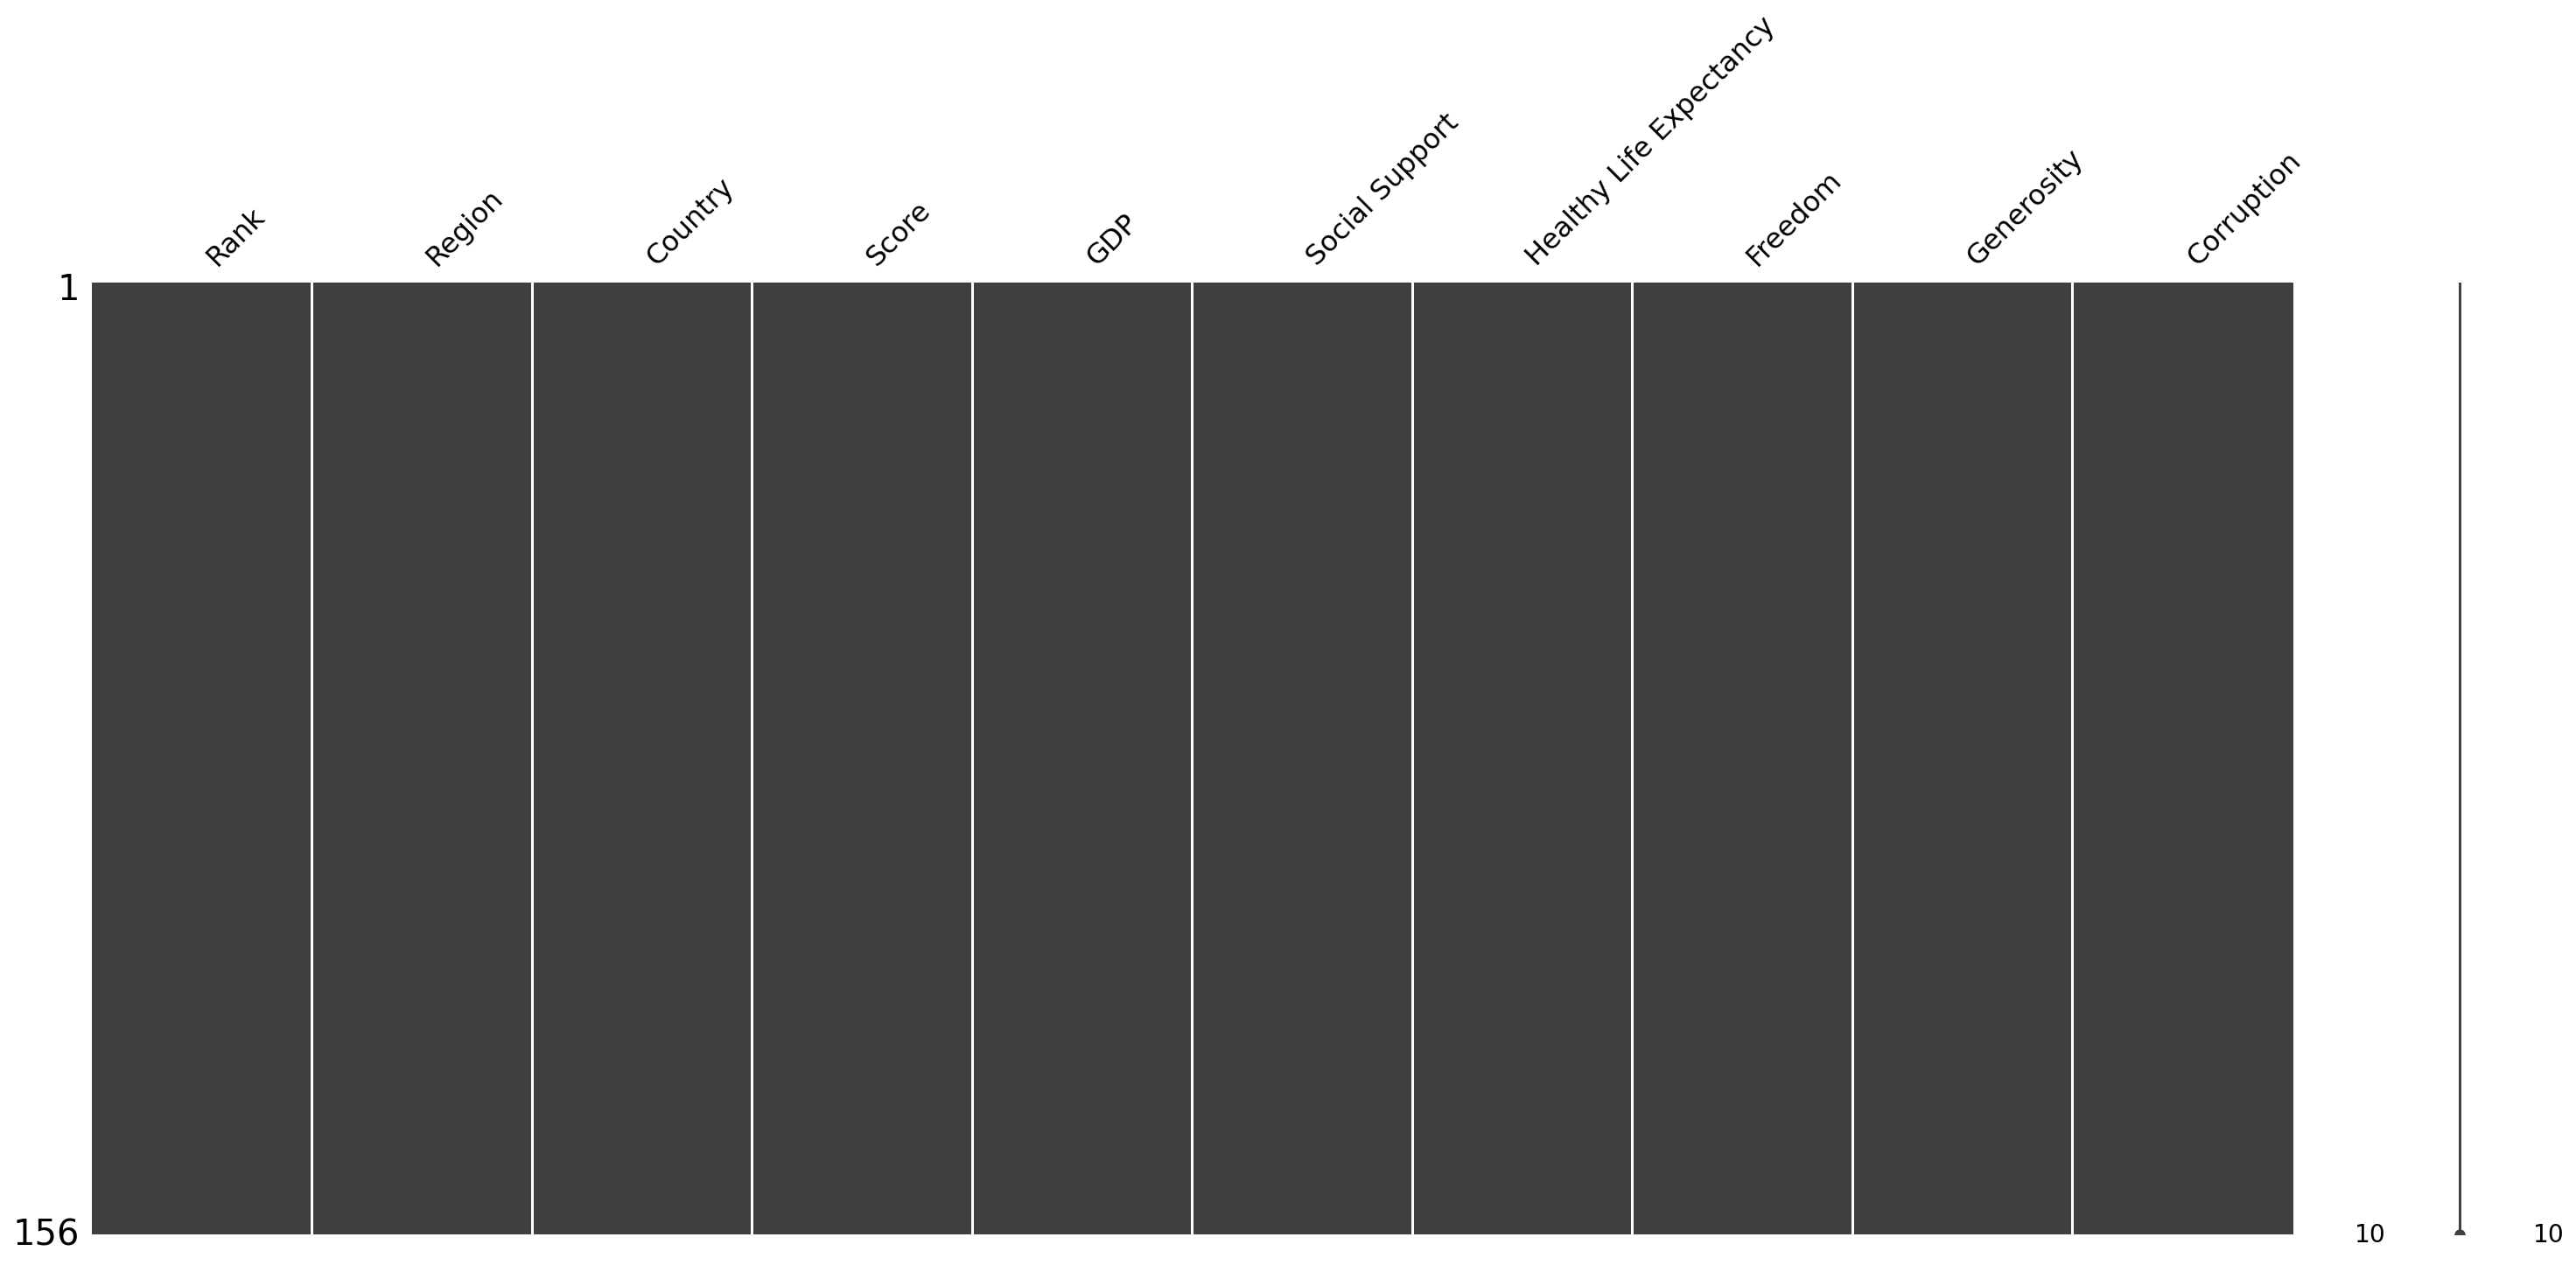

In [11]:
msno.matrix(happiness2019)
plt.show()

None 외 결측치 정리

In [12]:
# 값이 0인 행 개수 카운트
for c in happiness2019.columns:
    print(f'{c} : {len(happiness2019[happiness2019[c]==0])}')

Rank : 0
Region : 0
Country : 0
Score : 0
GDP : 1
Social Support : 1
Healthy Life Expectancy : 1
Freedom : 1
Generosity : 1
Corruption : 1


#피처별 분포 확인

###목적변수 skewness 확인

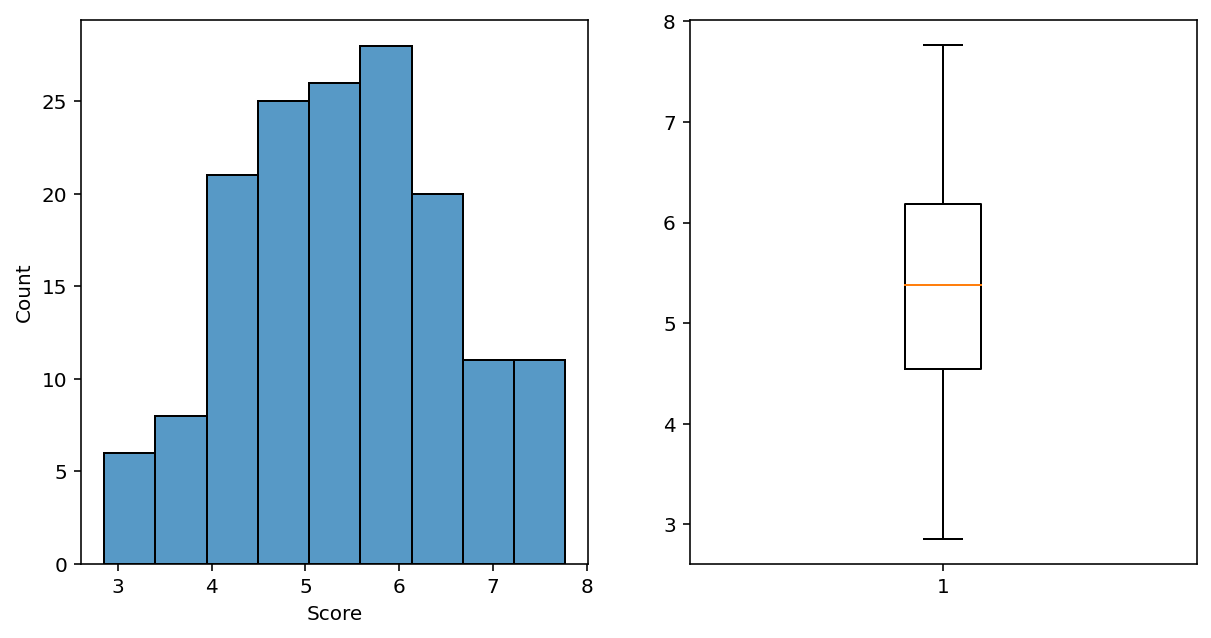

In [13]:
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
sns.histplot(happiness2019.Score)
plt.subplot(1,2,2)
plt.boxplot(happiness2019.Score)
plt.show()

피처 이상치 확인

In [14]:
keys = happiness2019.keys()
keys = keys[3:]

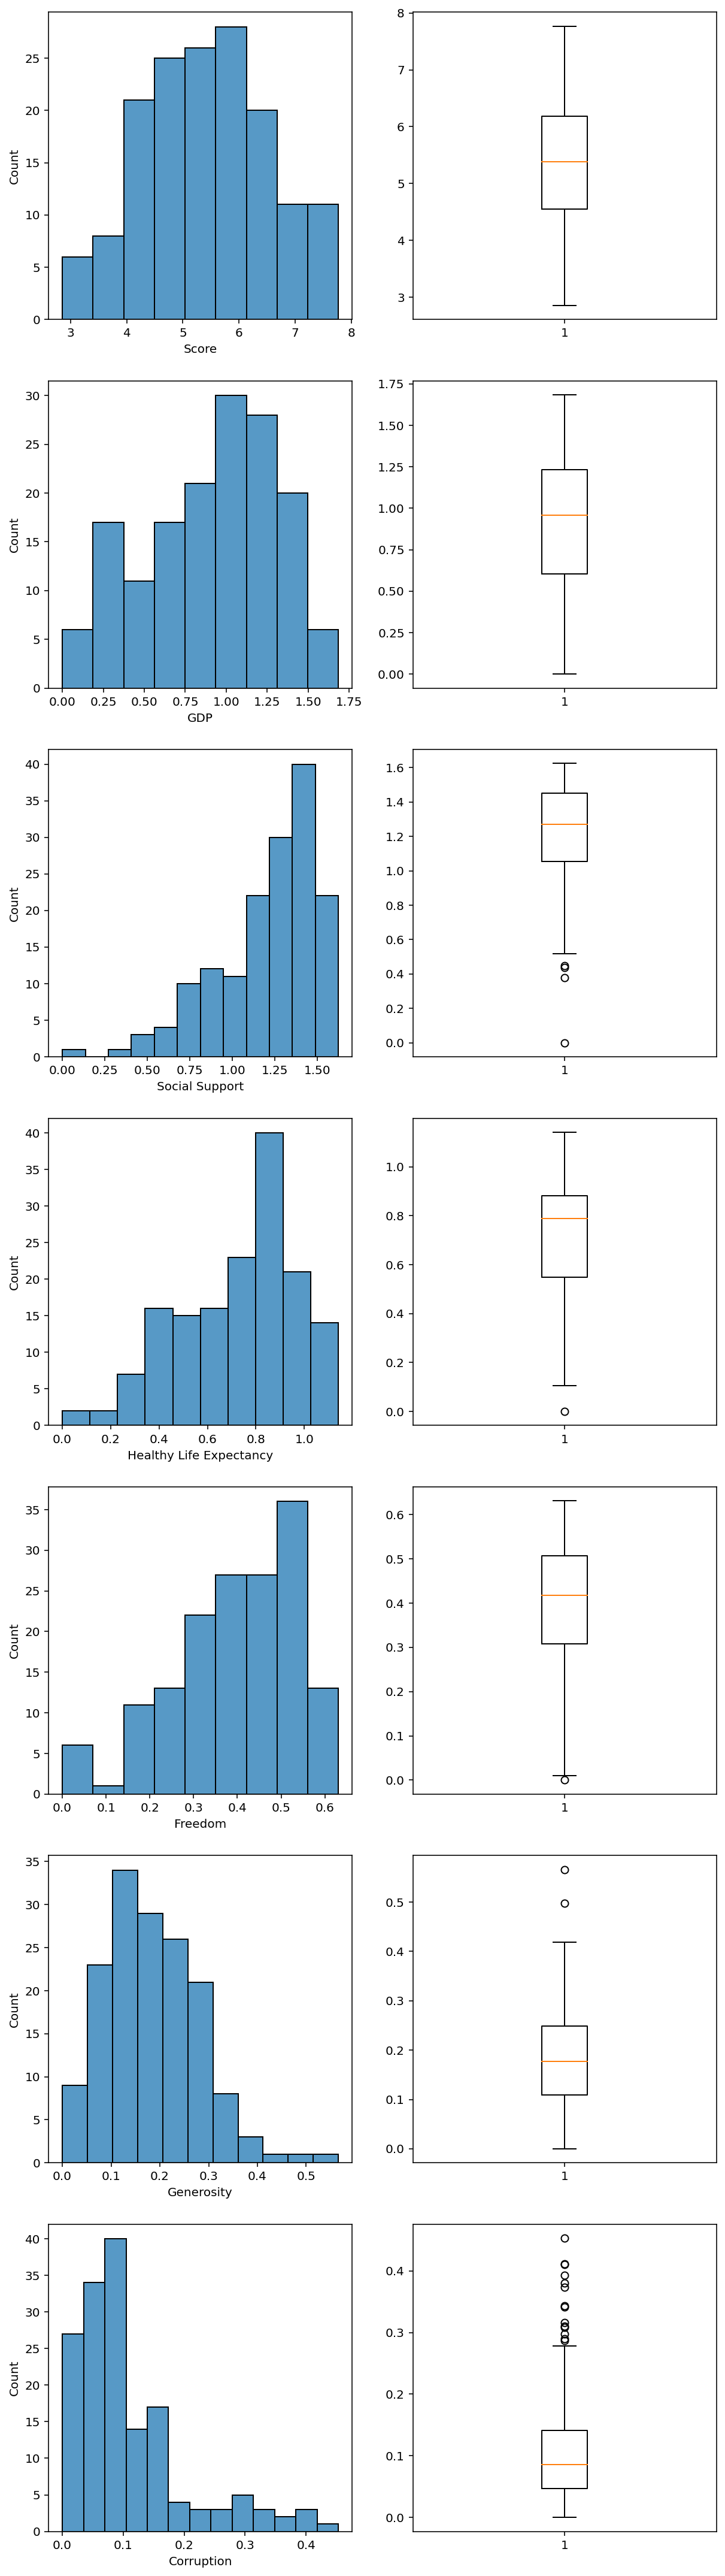

In [15]:
plt.figure(figsize=[10,50])
for iter, key in enumerate(keys):
    plt.subplot(9,2,2*iter+1)
    sns.histplot(happiness2019[key])
    plt.subplot(9,2,2*iter+2)
    plt.boxplot(happiness2019[key])
plt.show()



---



#피처의 필요성 확인

In [16]:
features_tmp = features[3:4] + features[7:]
happiness = [happiness2015, happiness2016, happiness2017, happiness2018, happiness2019]

각 피처별 가중치 확인
- score가 각 피처의 단순 합산인 것은, 피처의 값에 이미 가중치가 계산되었다고 판단
- 각 피처의 최대값(만점) 정보가 없어서, 전체 데이터에서 각 피처의 최대값을 확인함

In [17]:
statistics = {i:{'max':None, 'min':None} for i in features_tmp}
statistics

{'Score': {'max': None, 'min': None},
 'GDP': {'max': None, 'min': None},
 'Social Support': {'max': None, 'min': None},
 'Healthy Life Expectancy': {'max': None, 'min': None},
 'Freedom': {'max': None, 'min': None},
 'Corruption': {'max': None, 'min': None},
 'Generosity': {'max': None, 'min': None},
 'Dystopia Residual': {'max': None, 'min': None}}

###1. Dystopia Residual

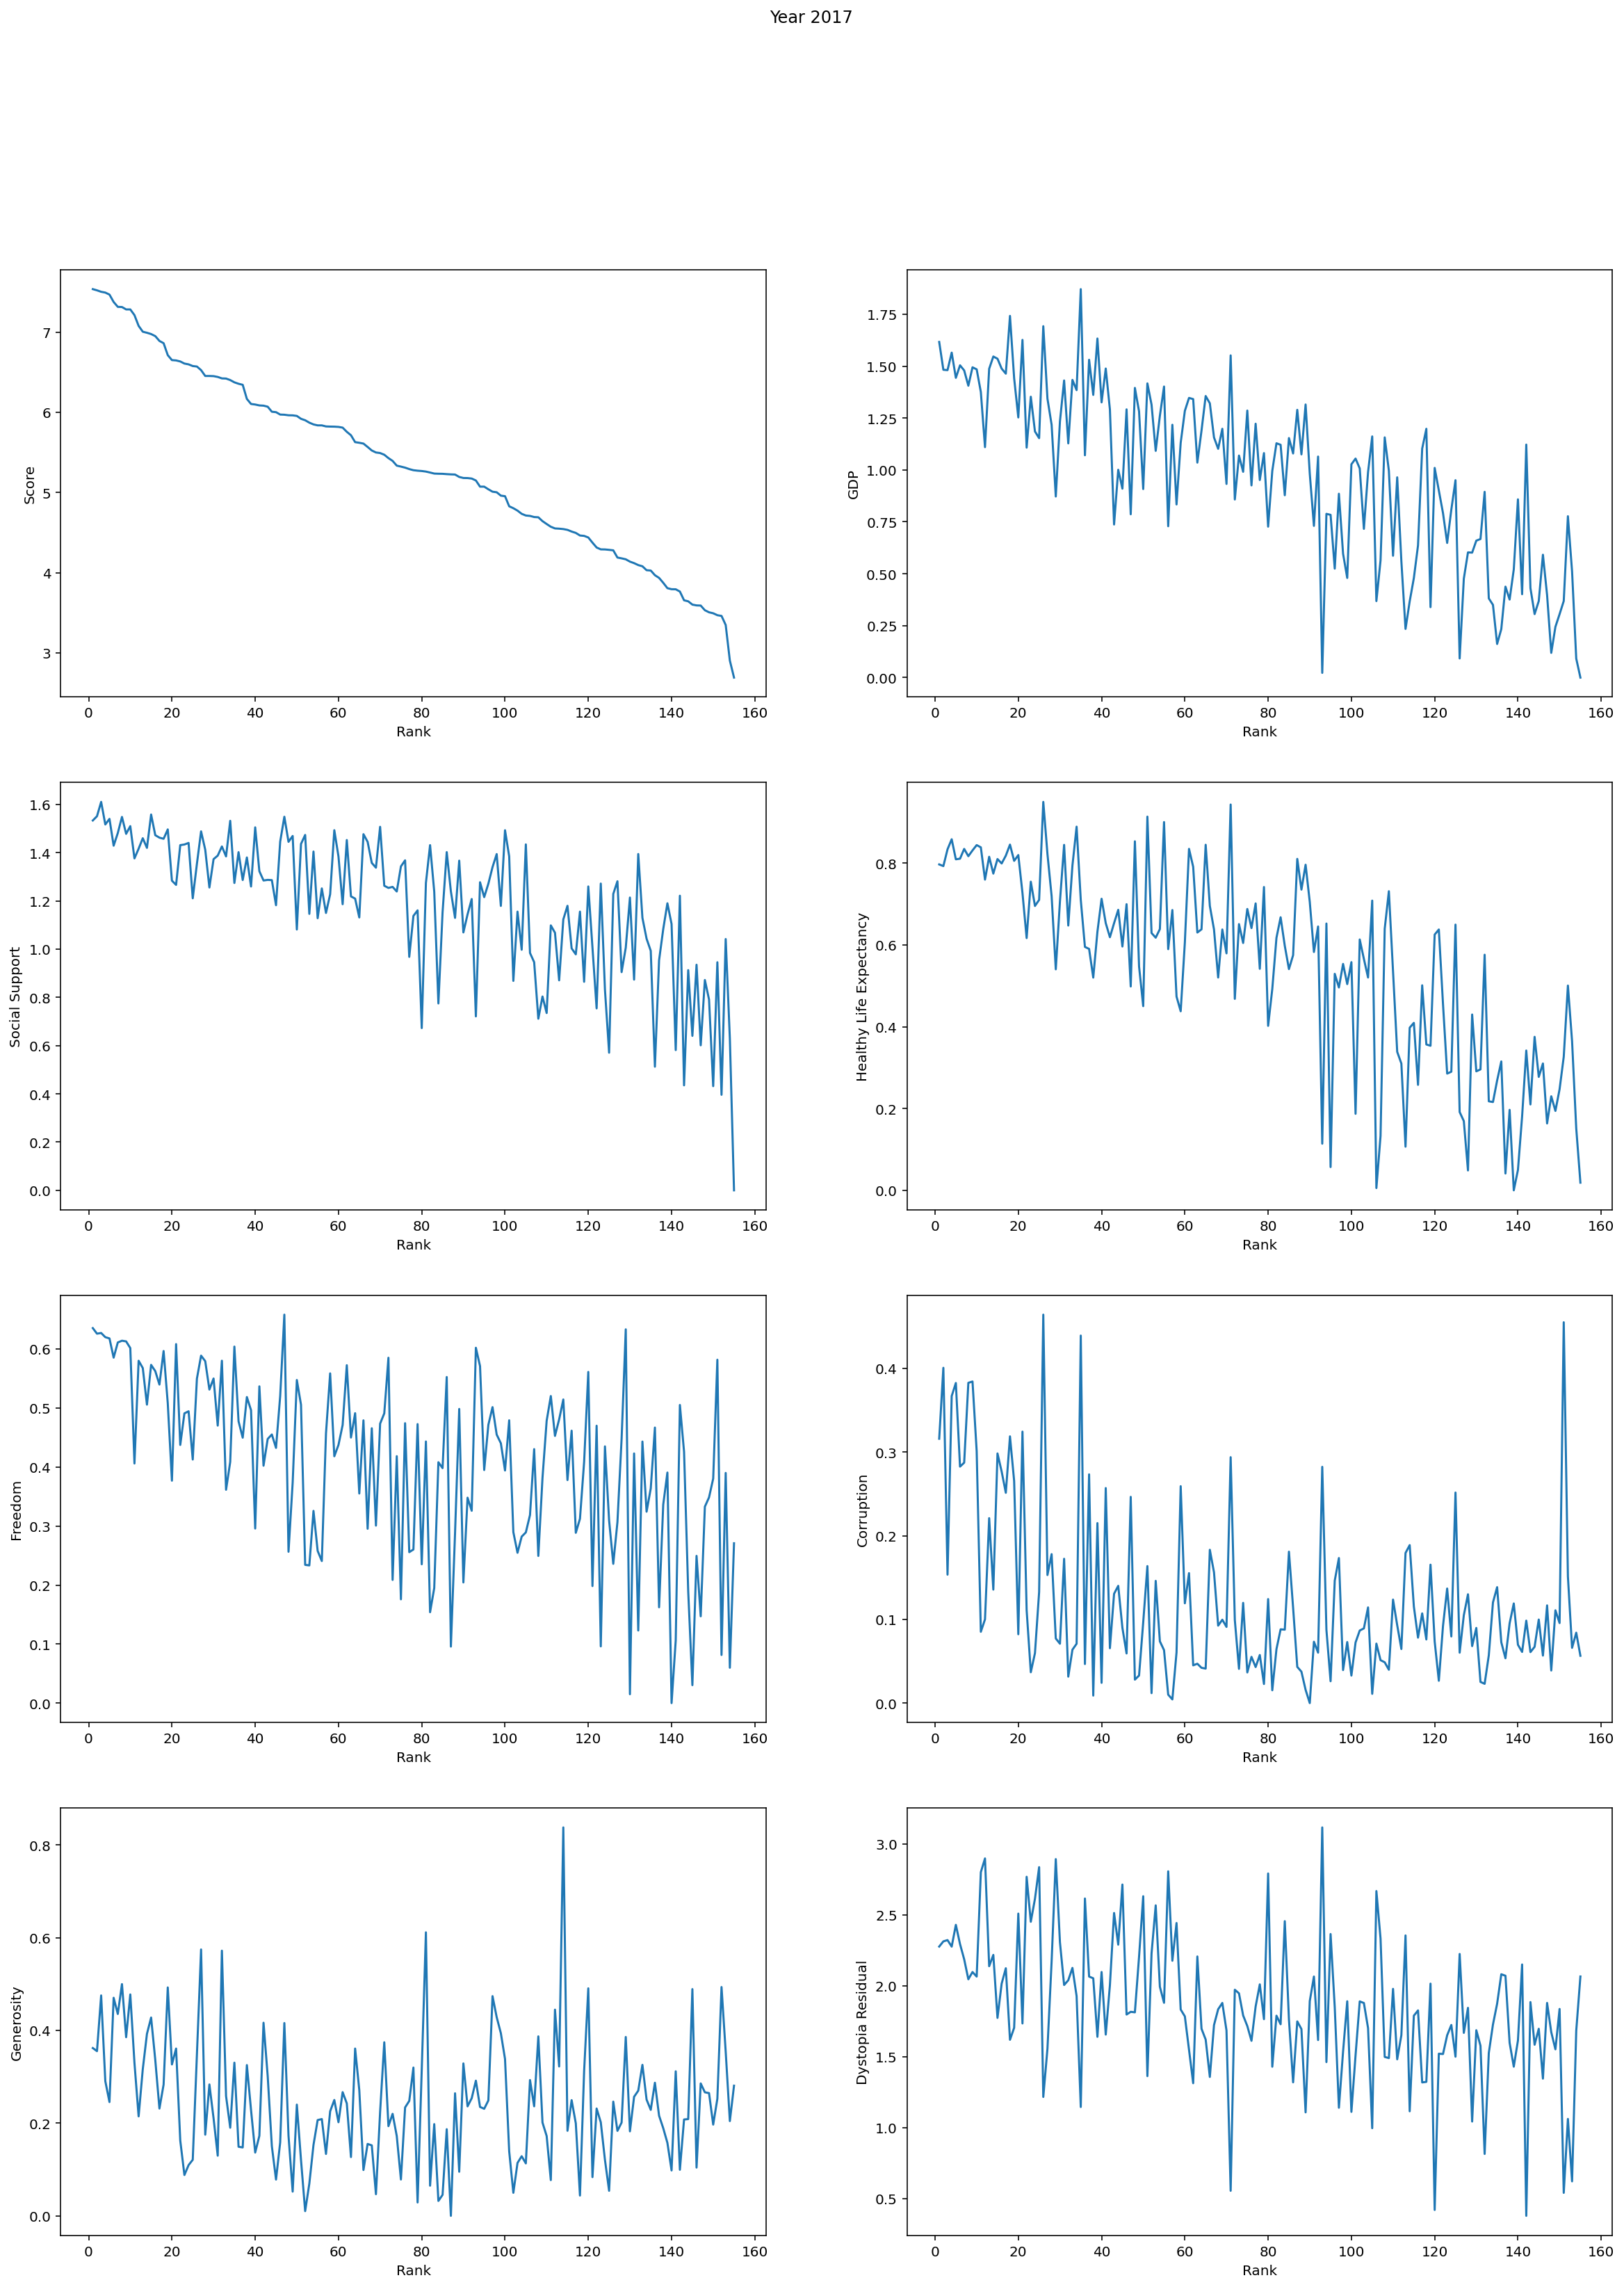

In [18]:
plt.figure(figsize=(20,26))
plt.suptitle('Year 2017')
for iter, feature in enumerate(features_tmp):
    plt.subplot(4,2,iter+1)
    plt.plot(happiness2017.Rank, happiness2017[feature])
    plt.ylabel(feature)
    plt.xlabel('Rank')
plt.show()

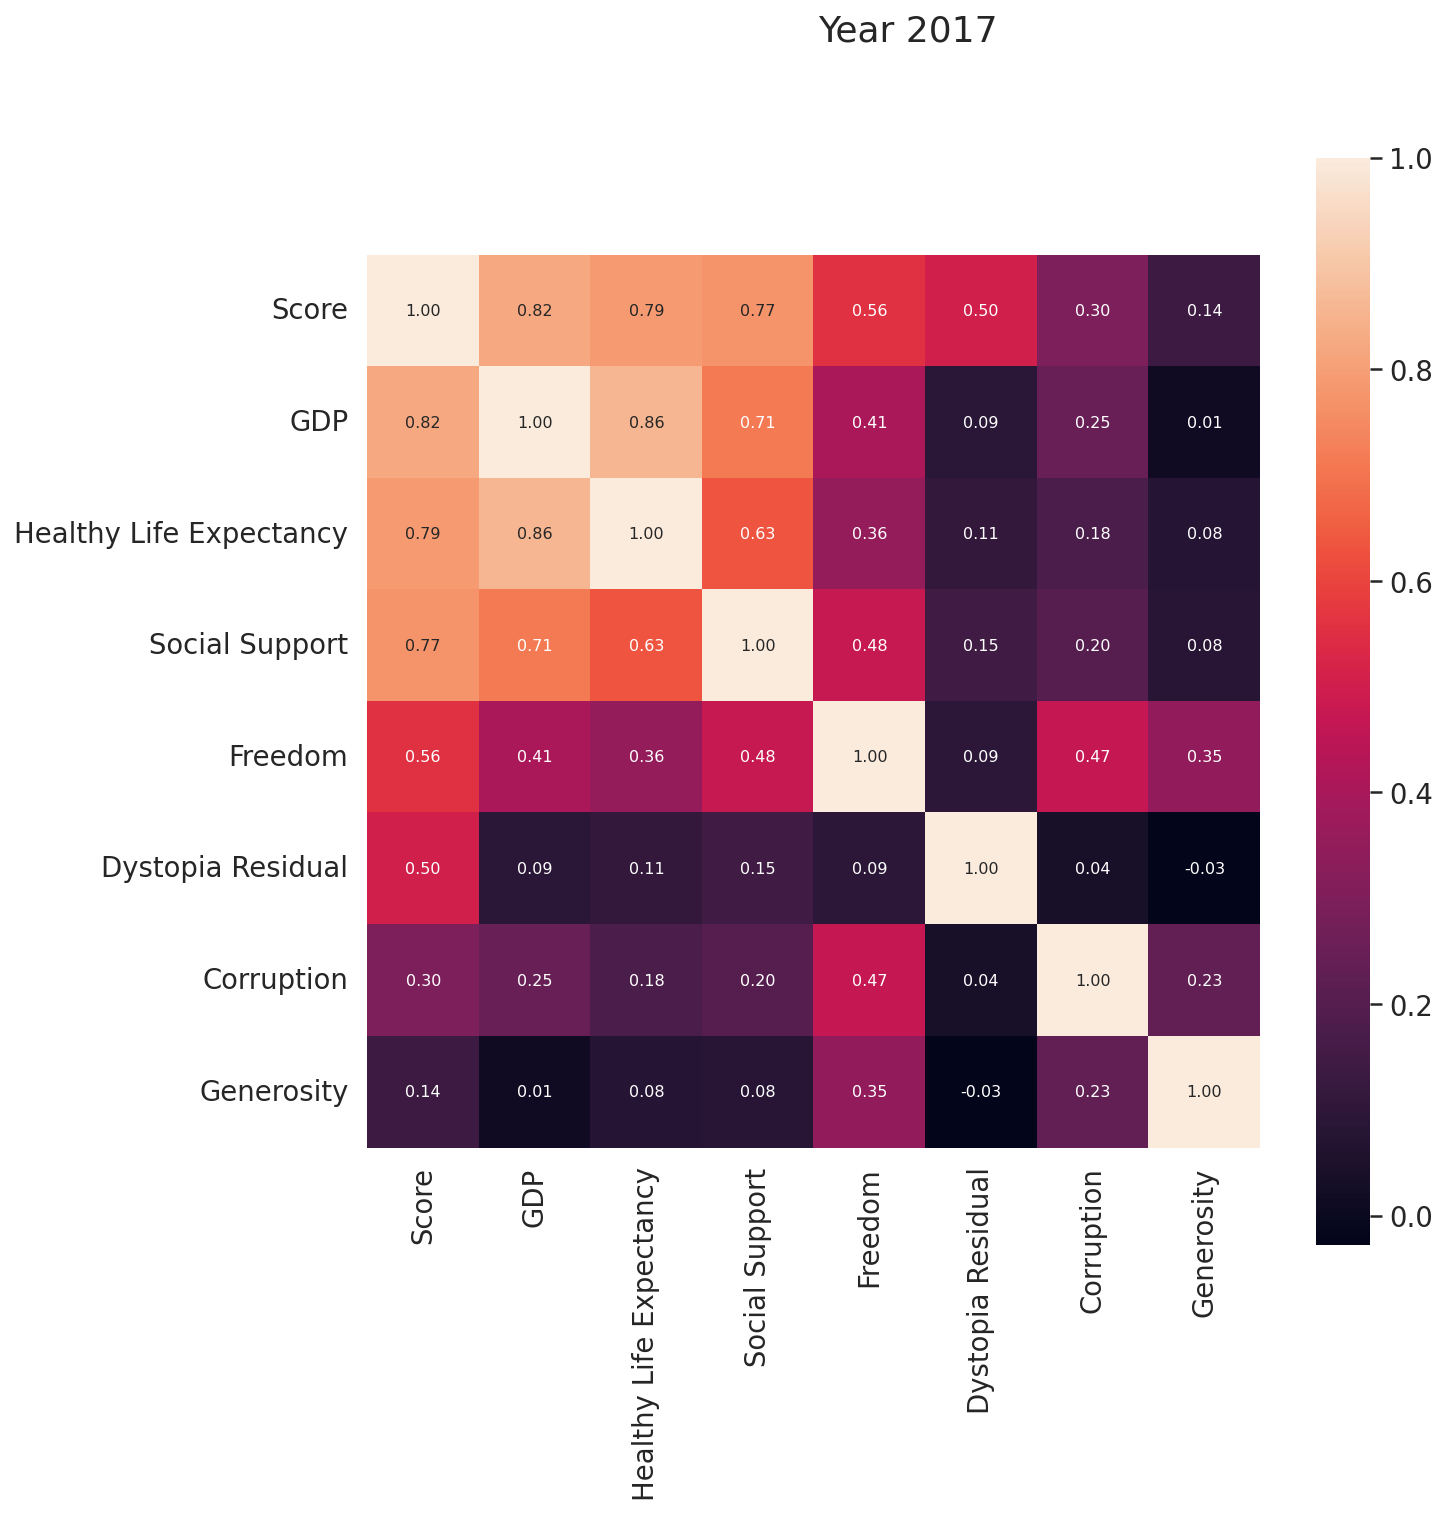

In [19]:
cor_abs = abs(happiness2017[features_tmp].corr(method='spearman'))
cor_cols = cor_abs.nlargest(n=8, columns='Score').index
cor = np.array(sp.stats.spearmanr(happiness2017[cor_cols].values))[0]
plt.figure(figsize=(10,10))
sns.set(font_scale=1.25)
sns.heatmap(cor, fmt='.2f', annot=True, square=True, annot_kws={'size' : 8}, xticklabels=cor_cols.values, yticklabels=cor_cols.values)
plt.suptitle('Year 2017')
plt.show()

- Dystopia Residual은 Corruption, Generosity보다 값이 더 높은데, 2018-2019년에는 빠진 이유는 무엇인지?

###2. Generosity

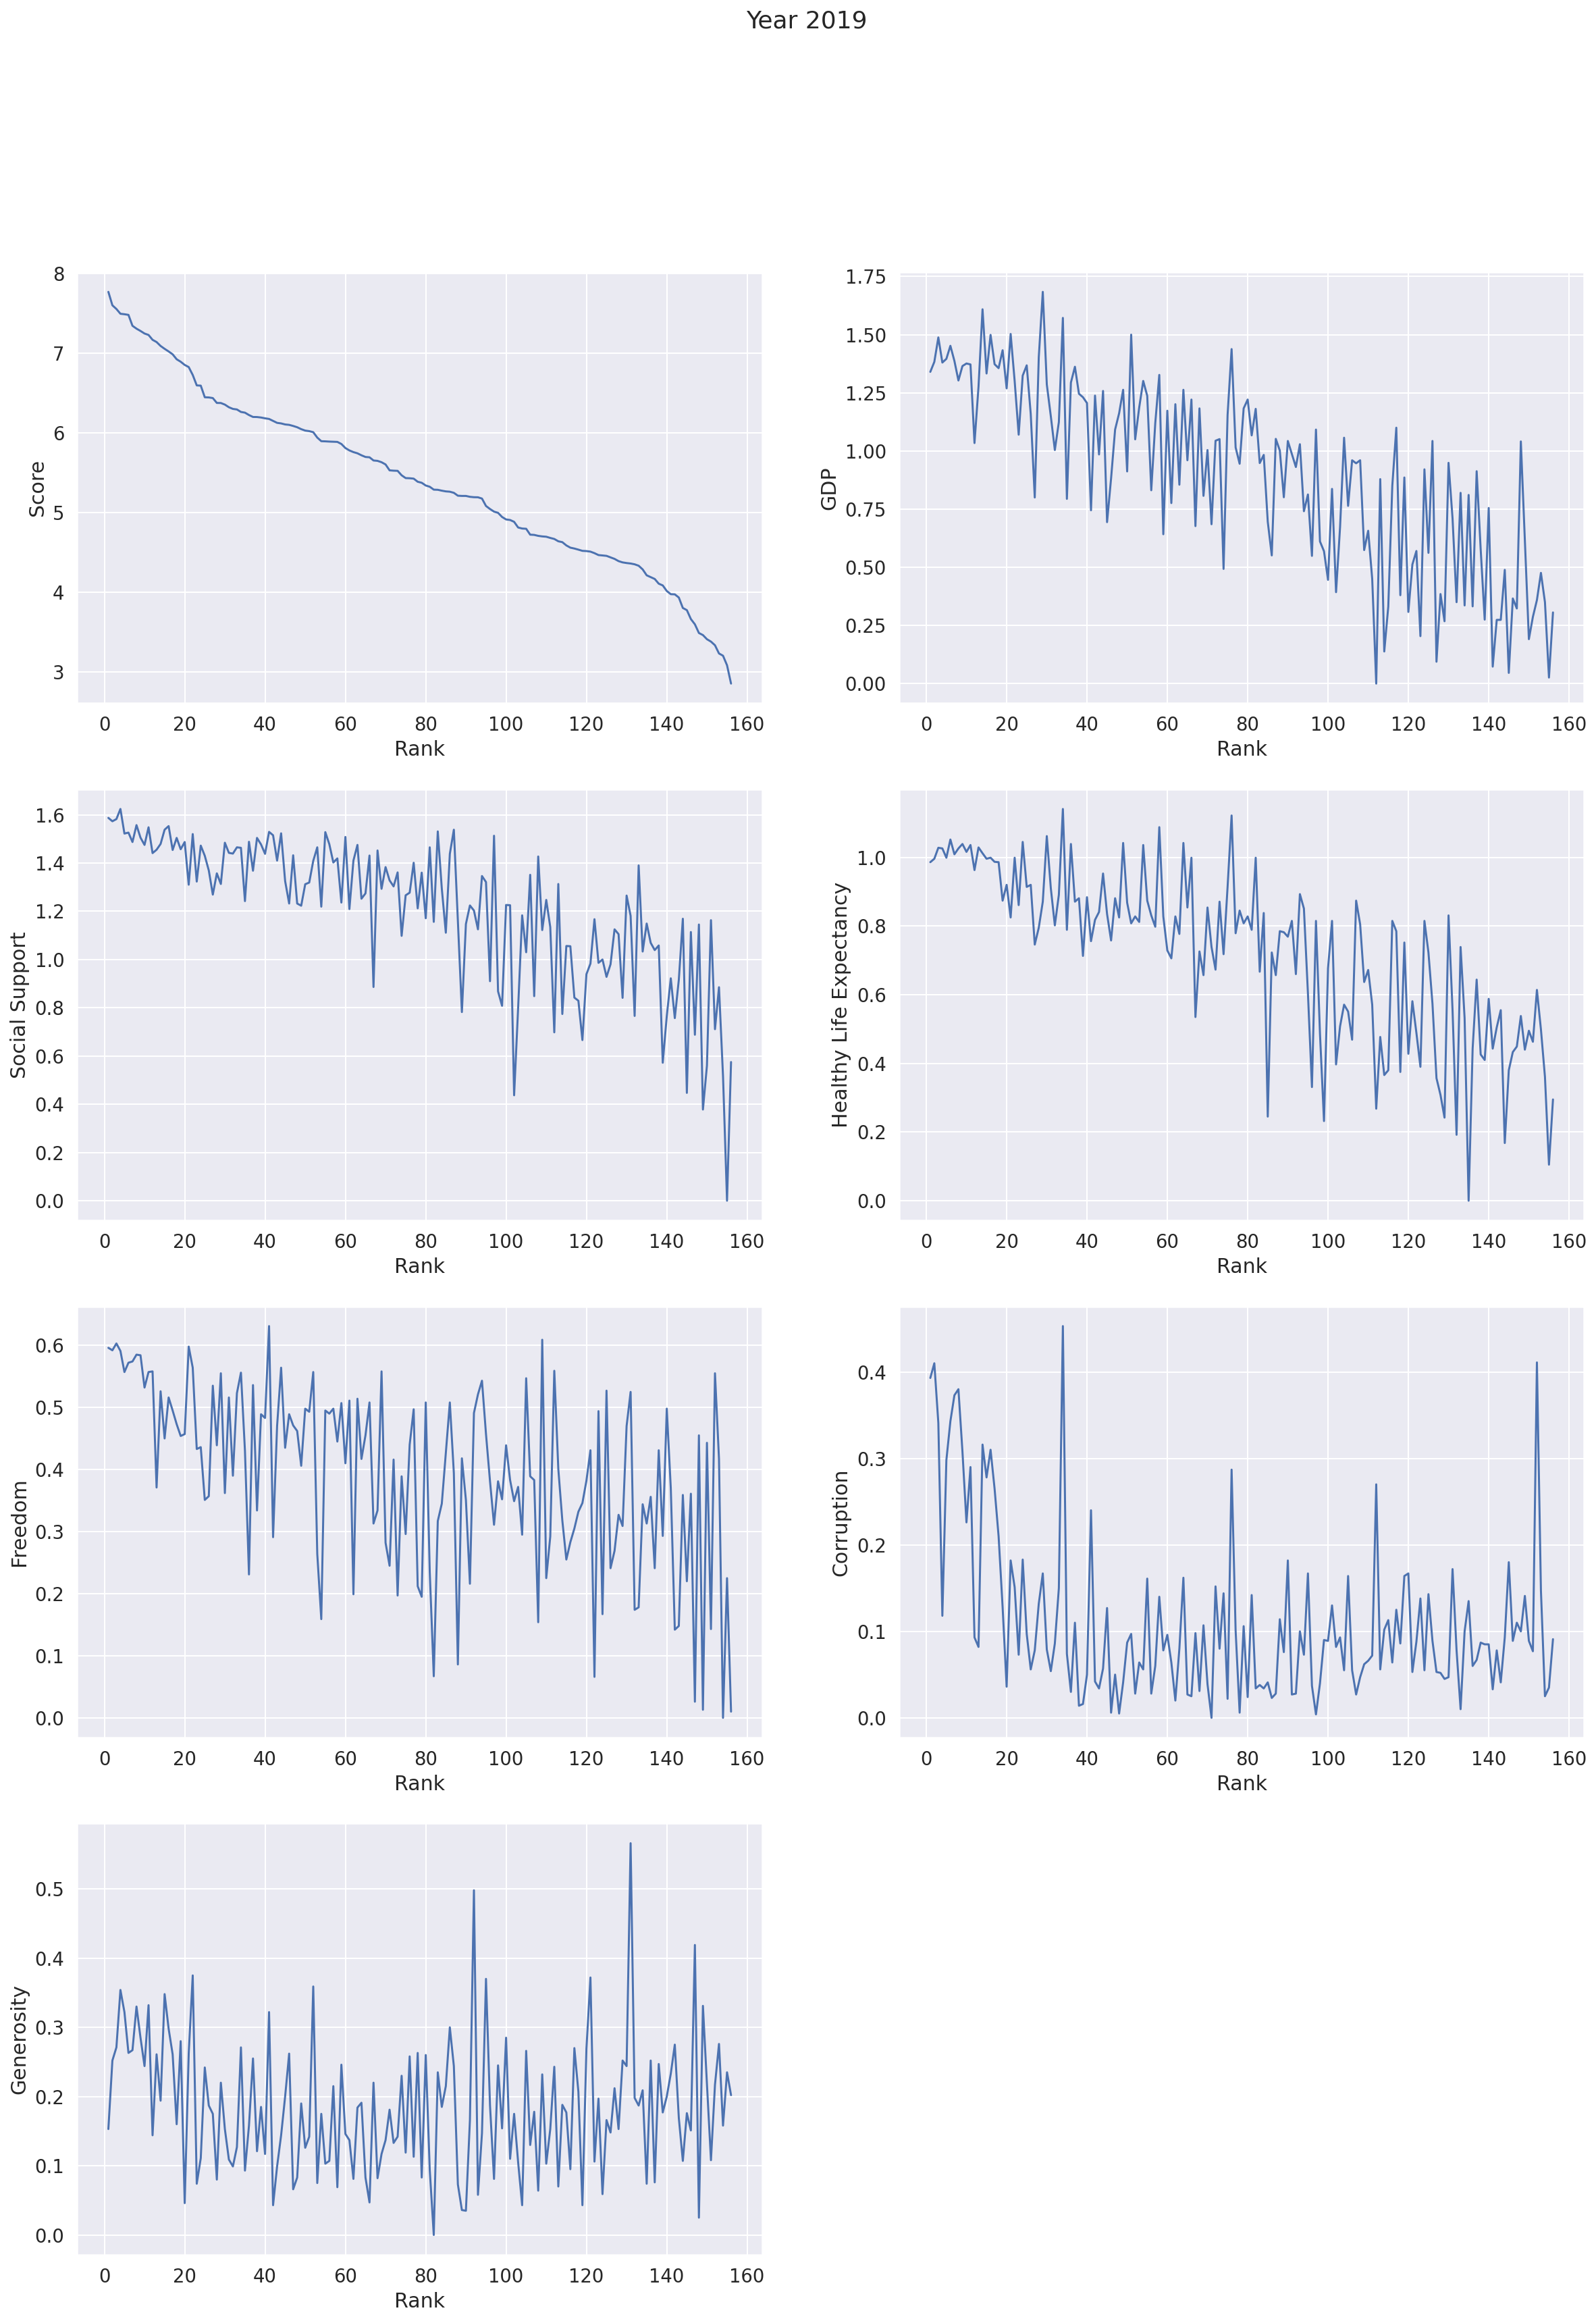

In [20]:
plt.figure(figsize=(20,27))
plt.suptitle('Year 2019')
for iter, feature in enumerate(features_tmp):
    if feature == 'Dystopia Residual':
        continue
    plt.subplot(4,2,iter+1)
    plt.plot(happiness2019.Rank, happiness2019[feature])
    plt.xlabel('Rank')
    plt.ylabel(feature)
plt.show()

- Corruption과 Generosity는 1-40위의 분별력을 위해 추가된 것으로 보임

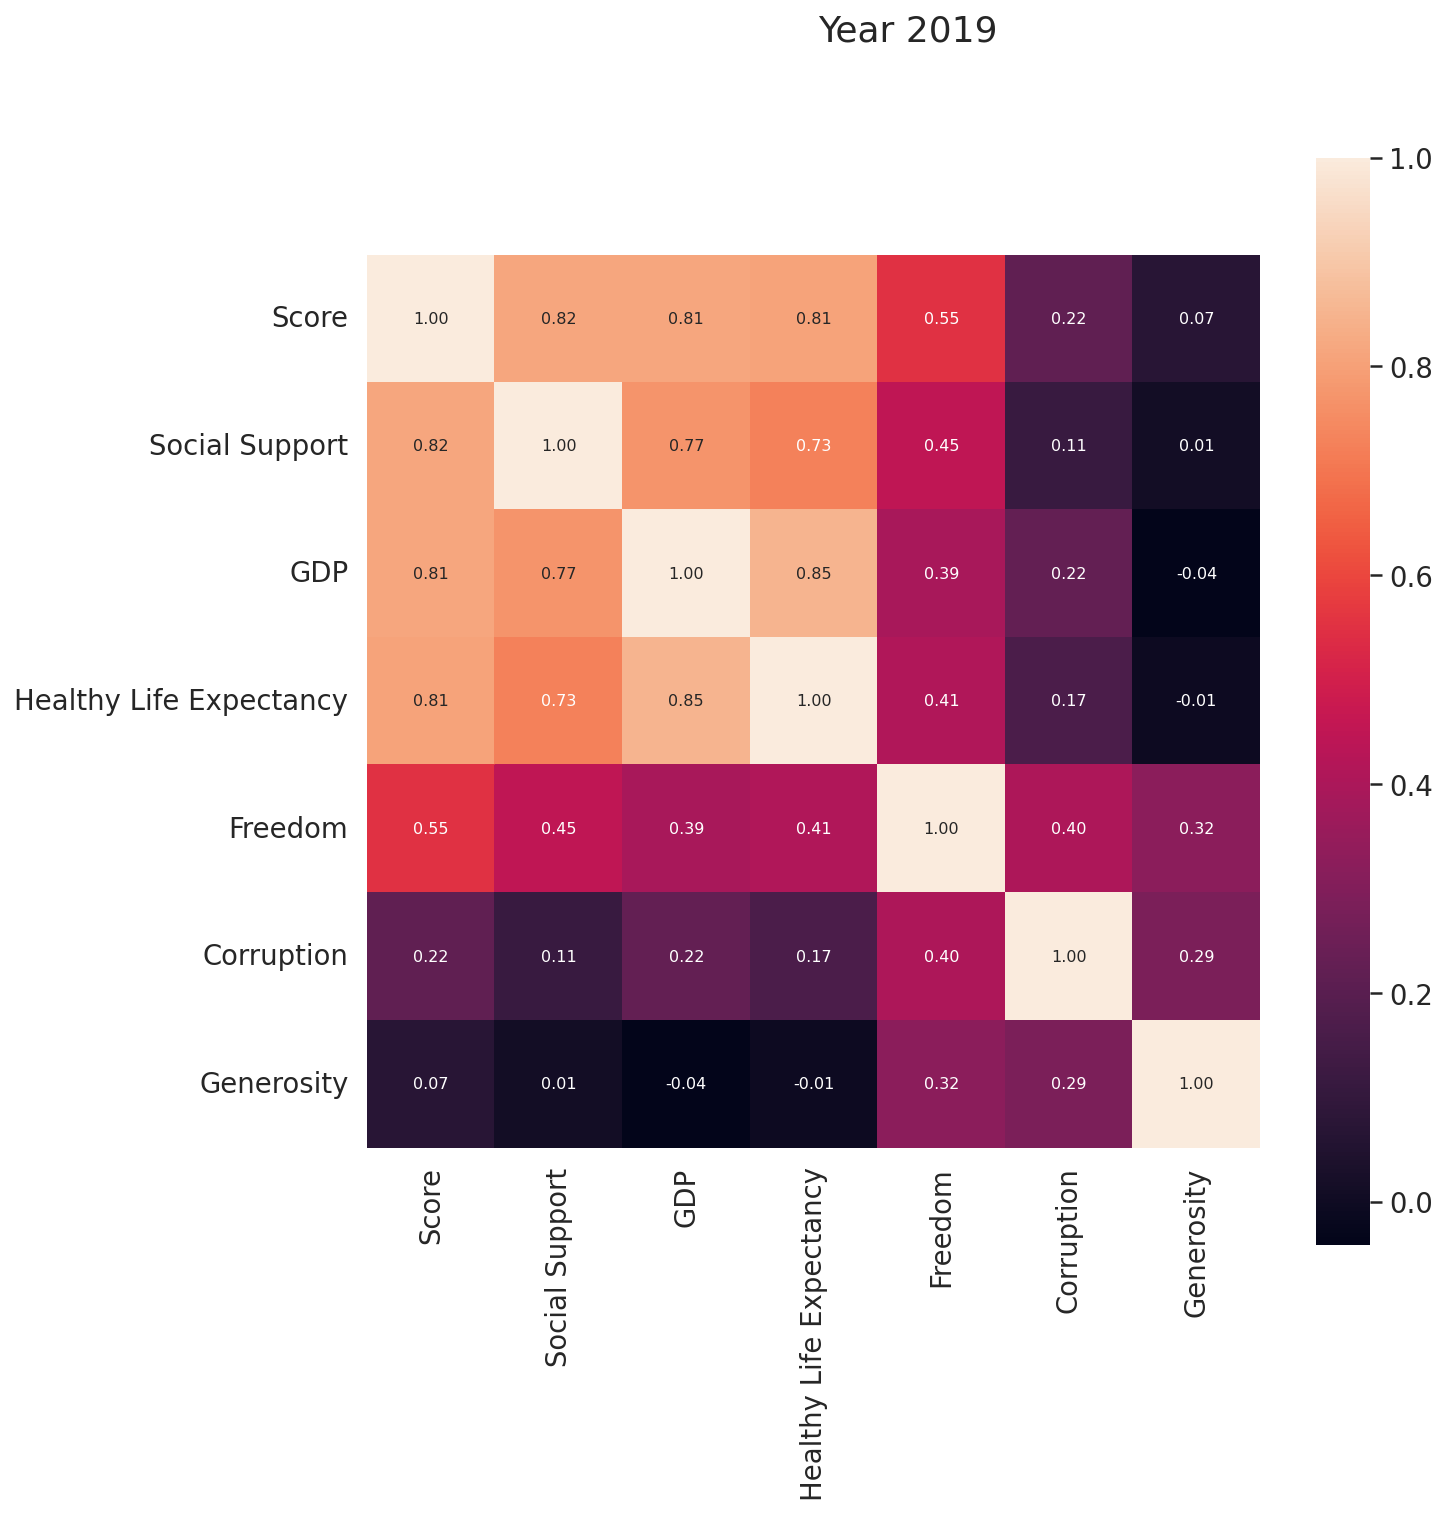

In [21]:
cor_abs = abs(happiness2019[features_tmp[:-1]].corr(method='spearman'))
cor_cols = cor_abs.nlargest(n=7, columns='Score').index
cor = np.array(sp.stats.spearmanr(happiness2019[cor_cols].values))[0]
plt.figure(figsize=(10,10))
sns.set(font_scale=1.25)
sns.heatmap(cor, fmt='.2f', annot=True, square=True, annot_kws={'size' : 8}, xticklabels=cor_cols.values, yticklabels=cor_cols.values)
plt.suptitle('Year 2019')
plt.show()

- 2017년 데이터와 비교했을 때, Social Support 비중이 높아짐
- Generosity는 가중치가 Corruption보다 높은데 비해, 상관분석에서의 관계성은 가장 낮다




1. 2015-2017년 데이터에서 Dystopia값 제외했을 때 순위 변화 확인하기
- 2018년부터 해당 피처를 제외했는데, 순위 변화 경향을 확인하면 다른 피처를 제외해도 되는지 판단 기준 나올 것으로 예상

#대륙별 행복지수


In [35]:
# 지역 별로 그루핑

df_Region2015 = happiness2015.groupby('Region').size()
df_Region2015 = df_Region2015.to_frame().reset_index()
df_Region2015.columns = ['Region', 'count']

df_Region2016 = happiness2016.groupby('Region').size()
df_Region2016 = df_Region2016.to_frame().reset_index()
df_Region2016.columns = ['Region', 'count']

df_Region2017 = happiness2017.groupby('Region').size()
df_Region2017 = df_Region2017.to_frame().reset_index()
df_Region2017.columns = ['Region', 'count']

df_Region2018 = happiness2018.groupby('Region').size()
df_Region2018 = df_Region2018.to_frame().reset_index()
df_Region2018.columns = ['Region', 'count']

df_Region2019 = happiness2019.groupby('Region').size()
df_Region2019 = df_Region2019.to_frame().reset_index()
df_Region2019.columns = ['Region', 'count']

In [36]:
# df_Region에 Score_Sum, Score_Avg, Std_Error column 추가

df_Region2015.insert(2, 'Score_Sum', 0.0)
df_Region2015.insert(3, 'Score_Avg', 0.0)
df_Region2015.insert(4, 'Std_Error', 0.0)

df_Region2016.insert(2, 'Score_Sum', 0.0)
df_Region2016.insert(3, 'Score_Avg', 0.0)
df_Region2016.insert(4, 'Std_Error', 0.0)

df_Region2017.insert(2, 'Score_Sum', 0.0)
df_Region2017.insert(3, 'Score_Avg', 0.0)
df_Region2017.insert(4, 'Std_Error', 0.0)

df_Region2018.insert(2, 'Score_Sum', 0.0)
df_Region2018.insert(3, 'Score_Avg', 0.0)
df_Region2018.insert(4, 'Std_Error', 0.0)

df_Region2019.insert(2, 'Score_Sum', 0.0)
df_Region2019.insert(3, 'Score_Avg', 0.0)
df_Region2019.insert(4, 'Std_Error', 0.0)

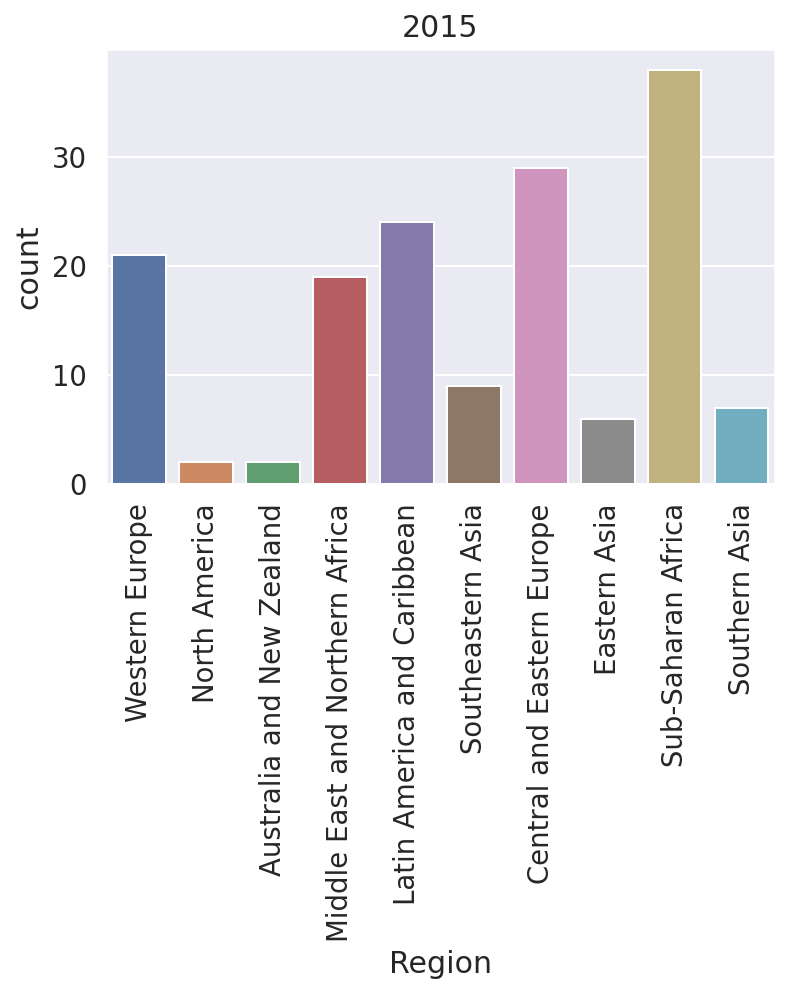

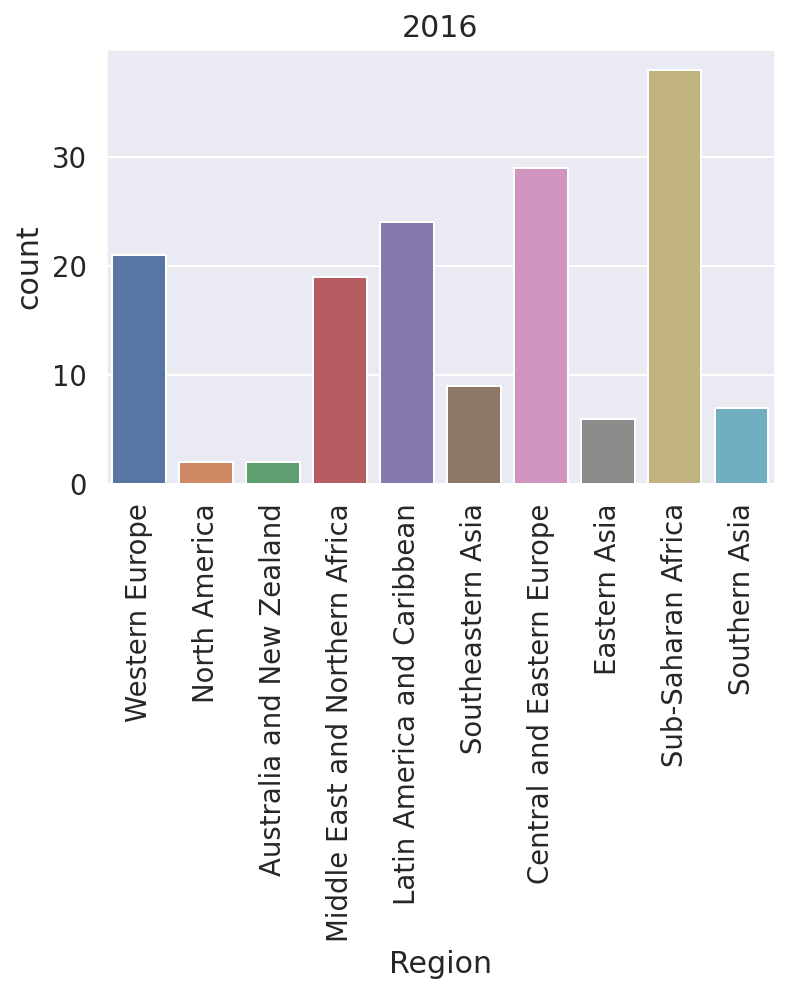

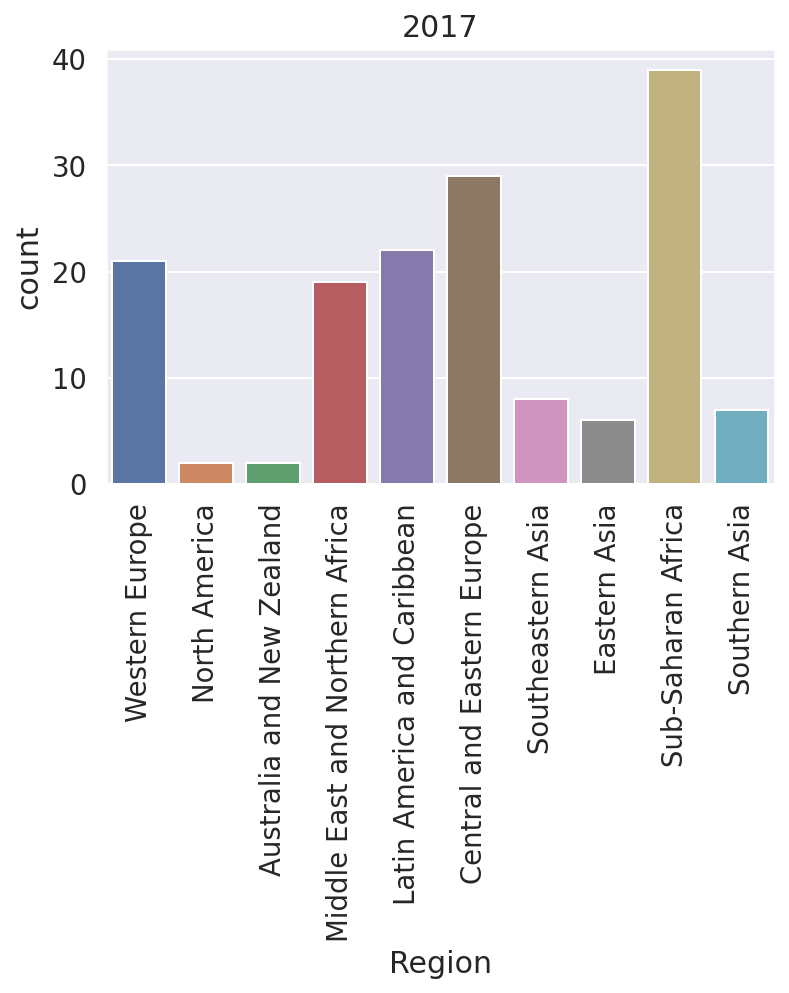

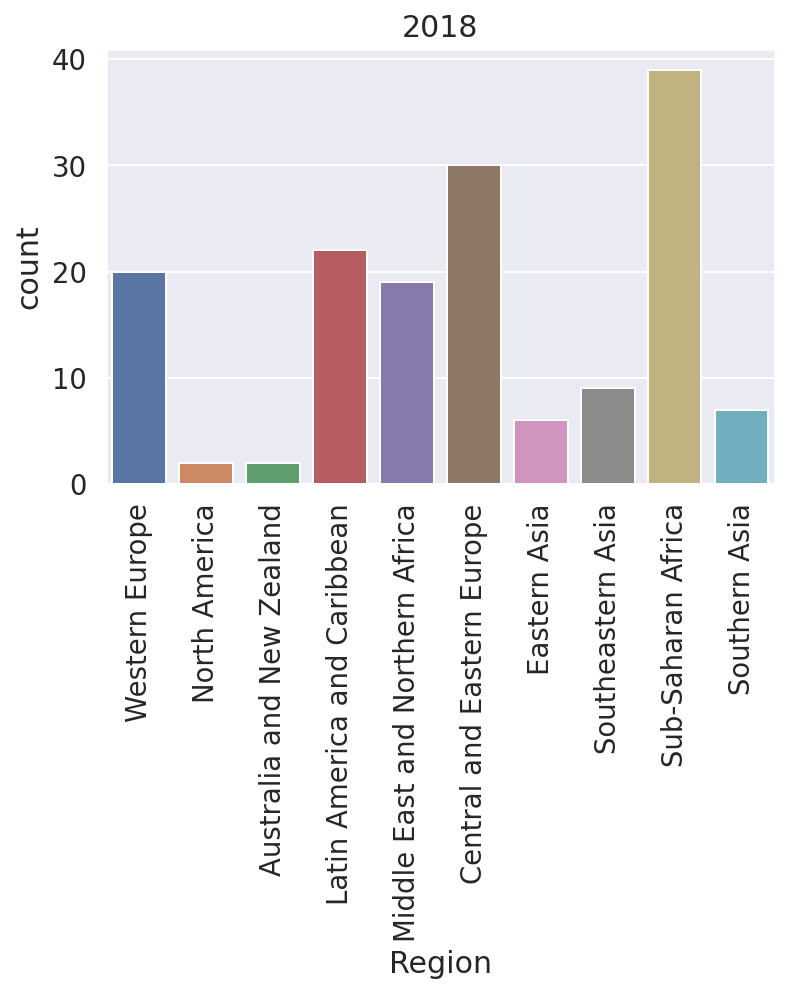

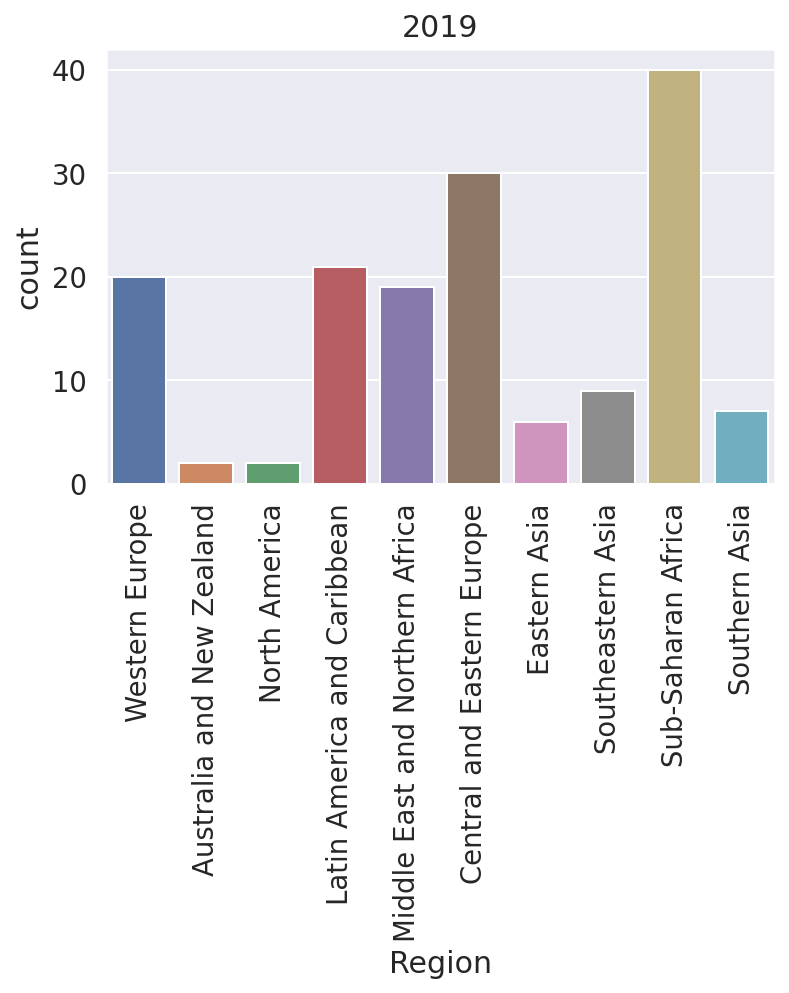

In [22]:
# Region별 국가수 시각화

ax = sns.countplot(data=happiness2016, x='Region')
ax.set_title(str(2015), fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

ax = sns.countplot(data=happiness2016, x='Region')
ax.set_title(str(2016), fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

ax = sns.countplot(data=happiness2017, x='Region')
ax.set_title(str(2017), fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

ax = sns.countplot(data=happiness2018, x='Region')
ax.set_title(str(2018), fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

ax = sns.countplot(data=happiness2019, x='Region')
ax.set_title(str(2019), fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

In [39]:
# Errorbar chart를 그리기 위해서 Standard Error 구하기

Score_Region = {}
for i in range(len(happiness2015)):
    for k in range(len(df_Region2015)):
        if happiness2015['Region'][i] == df_Region2015['Region'][k]:
            r = happiness2015['Region'][i]
            s = happiness2015['Score'][i]
            if r in Score_Region:
                Score_Region[r].append(s)
            else:
                Score_Region[r] = [s]

for i in range(len(df_Region2015)):
    r = df_Region2015['Region'][i]
    df_Region2015['Std_Error'][i] = np.std(Score_Region[r], ddof=1) / np.sqrt(np.size(Score_Region[r]))

Score_Region = {}
for i in range(len(happiness2016)):
    for k in range(len(df_Region2016)):
        if happiness2016['Region'][i] == df_Region2016['Region'][k]:
            r = happiness2016['Region'][i]
            s = happiness2016['Score'][i]
            if r in Score_Region:
                Score_Region[r].append(s)
            else:
                Score_Region[r] = [s]

for i in range(len(df_Region2016)):
    r = df_Region2016['Region'][i]
    df_Region2016['Std_Error'][i] = np.std(Score_Region[r], ddof=1) / np.sqrt(np.size(Score_Region[r]))

Score_Region = {}
for i in range(len(happiness2017)):
    for k in range(len(df_Region2017)):
        if happiness2017['Region'][i] == df_Region2017['Region'][k]:
            r = happiness2017['Region'][i]
            s = happiness2017['Score'][i]
            if r in Score_Region:
                Score_Region[r].append(s)
            else:
                Score_Region[r] = [s]

for i in range(len(df_Region2017)):
    r = df_Region2017['Region'][i]
    df_Region2017['Std_Error'][i] = np.std(Score_Region[r], ddof=1) / np.sqrt(np.size(Score_Region[r]))

Score_Region = {}
for i in range(len(happiness2018)):
    for k in range(len(df_Region2018)):
        if happiness2018['Region'][i] == df_Region2018['Region'][k]:
            r = happiness2018['Region'][i]
            s = happiness2018['Score'][i]
            if r in Score_Region:
                Score_Region[r].append(s)
            else:
                Score_Region[r] = [s]

for i in range(len(df_Region2018)):
    r = df_Region2018['Region'][i]
    df_Region2018['Std_Error'][i] = np.std(Score_Region[r], ddof=1) / np.sqrt(np.size(Score_Region[r]))

Score_Region = {}
for i in range(len(happiness2019)):
    for k in range(len(df_Region2019)):
        if happiness2019['Region'][i] == df_Region2019['Region'][k]:
            r = happiness2019['Region'][i]
            s = happiness2019['Score'][i]
            if r in Score_Region:
                Score_Region[r].append(s)
            else:
                Score_Region[r] = [s]

for i in range(len(df_Region2019)):
    r = df_Region2019['Region'][i]
    df_Region2019['Std_Error'][i] = np.std(Score_Region[r], ddof=1) / np.sqrt(np.size(Score_Region[r]))

2015                             Region  count  Score_Sum  Score_Avg  Std_Error
0        Australia and New Zealand      2     14.570   7.285000   0.001000
1       Central and Eastern Europe     29    154.655   5.332931   0.105929
2                     Eastern Asia      6     33.757   5.626167   0.226191
3      Latin America and Caribbean     22    135.183   6.144682   0.155330
4  Middle East and Northern Africa     20    108.138   5.406900   0.246276
5                    North America      2     14.546   7.273000   0.154000
6                Southeastern Asia      9     47.857   5.317444   0.316673
7                    Southern Asia      7     32.066   4.580857   0.215639
8               Sub-Saharan Africa     40    168.112   4.202800   0.096379
9                   Western Europe     21    140.482   6.689619   0.179939

2016                             Region  count  Score_Sum  Score_Avg  Std_Error
0        Australia and New Zealand      2     14.647   7.323500   0.010500
1       Centra

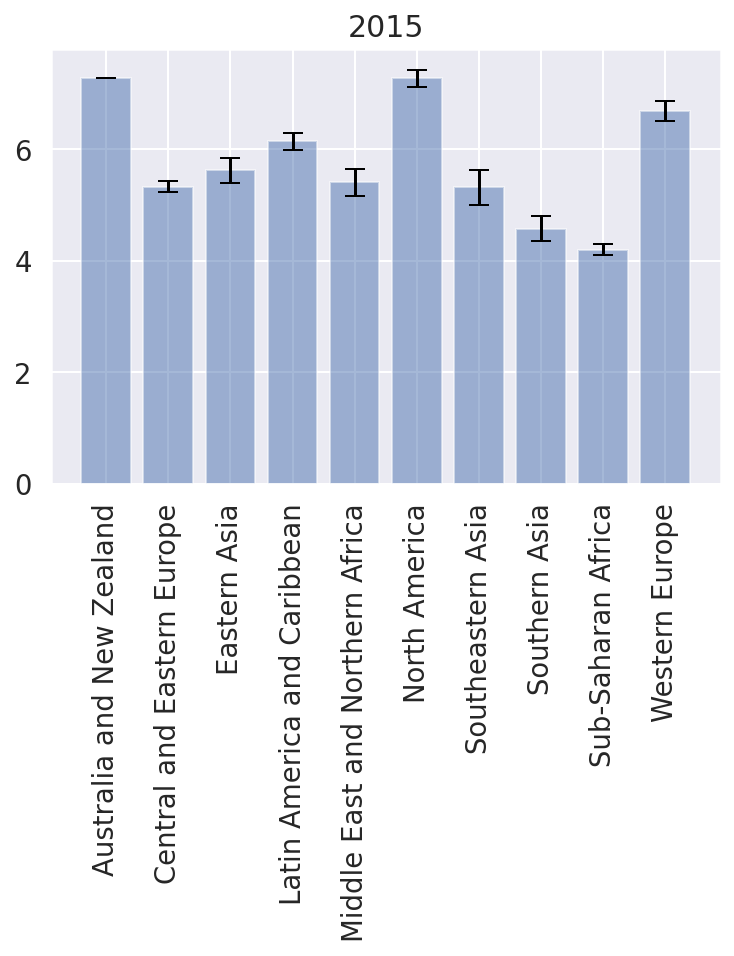

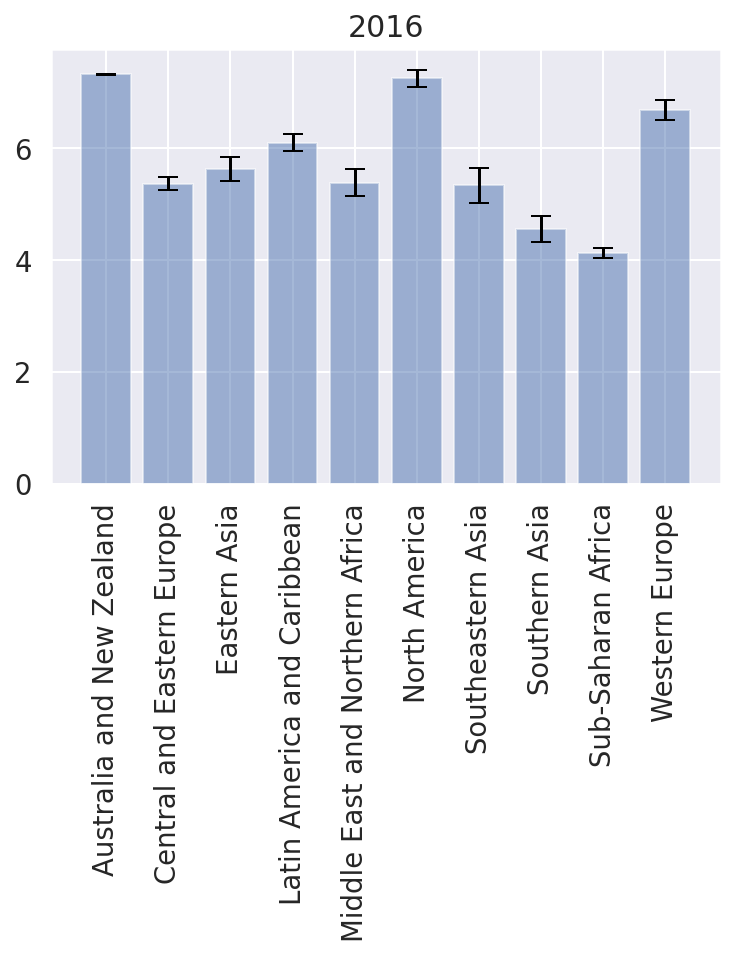

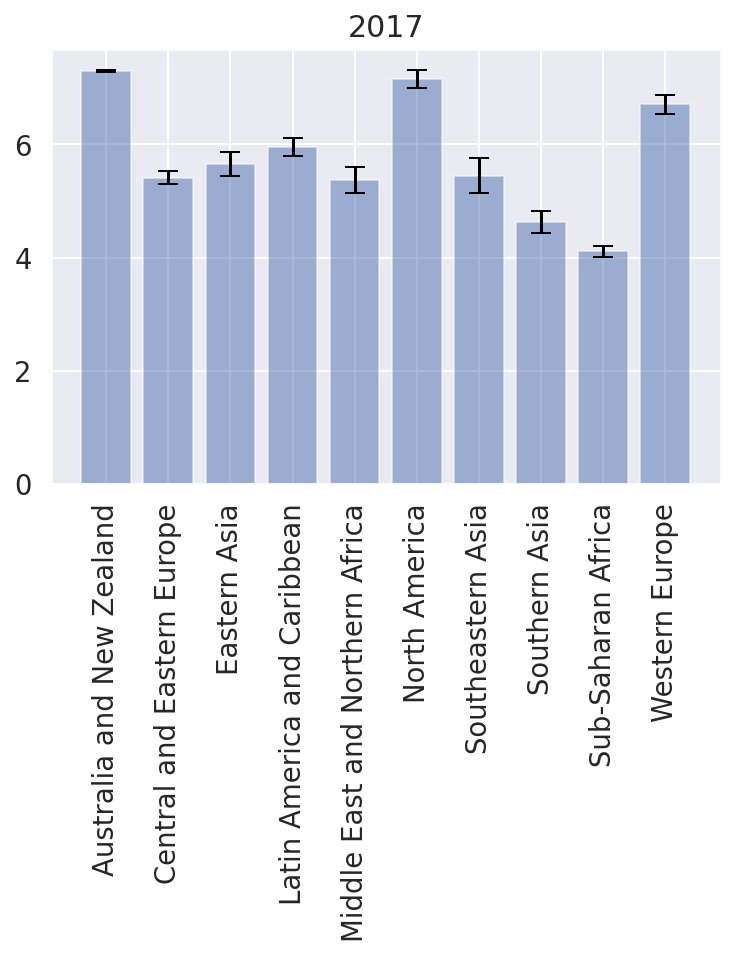

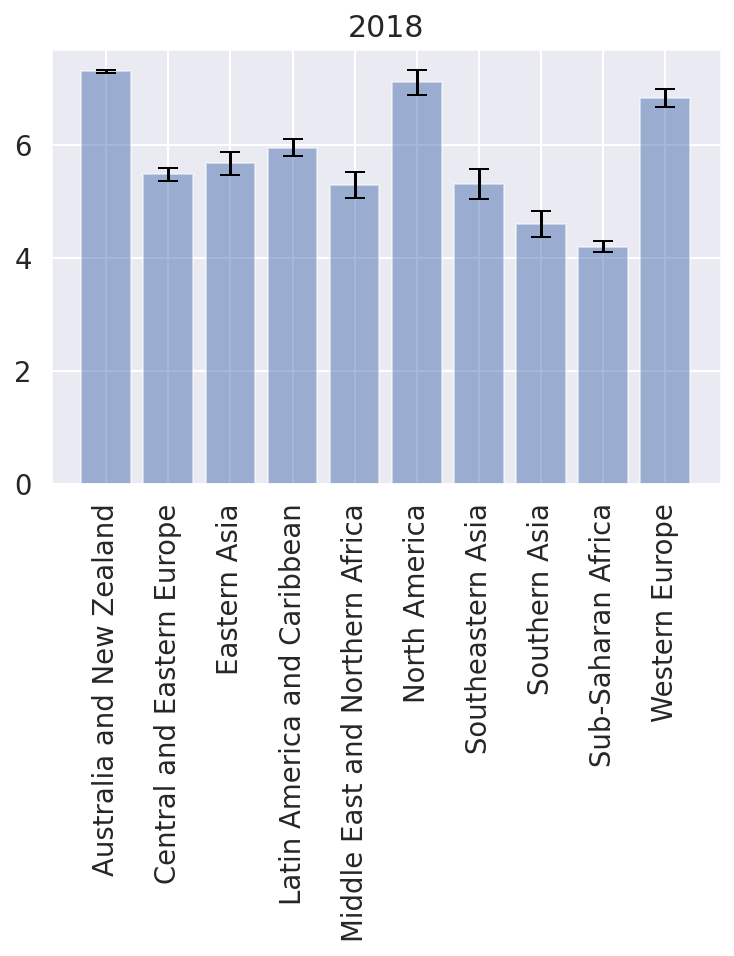

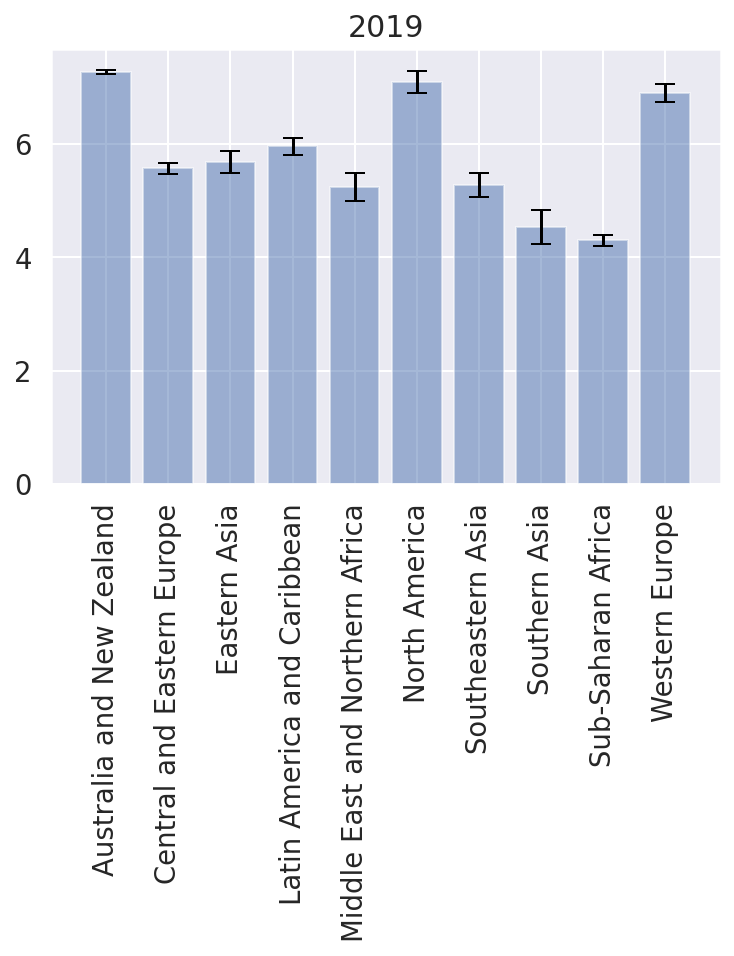

In [38]:
# 각 Region별 행복지수 평균값 구하기

for i in range(len(happiness2015)):
    for k in range(len(df_Region2015)):
        if happiness2015['Region'][i] == df_Region2015['Region'][k]:
            df_Region2015['Score_Sum'][k] += happiness2015['Score'][i]

for i in range(len(happiness2016)):
    for k in range(len(df_Region2016)):
        if happiness2016['Region'][i] == df_Region2016['Region'][k]:
            df_Region2016['Score_Sum'][k] += happiness2016['Score'][i]

for i in range(len(happiness2017)):
    for k in range(len(df_Region2017)):
        if happiness2017['Region'][i] == df_Region2017['Region'][k]:
            df_Region2017['Score_Sum'][k] += happiness2017['Score'][i]

for i in range(len(happiness2018)):
    for k in range(len(df_Region2018)):
        if happiness2018['Region'][i] == df_Region2018['Region'][k]:
            df_Region2018['Score_Sum'][k] += happiness2018['Score'][i]

for i in range(len(happiness2019)):
    for k in range(len(df_Region2019)):
        if happiness2019['Region'][i] == df_Region2019['Region'][k]:
            df_Region2019['Score_Sum'][k] += happiness2019['Score'][i]


for i in range(len(df_Region2015)):
    df_Region2015['Score_Avg'][i] = df_Region2015['Score_Sum'][i] / df_Region2015['count'][i]
print('2015', df_Region2015)
print()

for i in range(len(df_Region2016)):
    df_Region2016['Score_Avg'][i] = df_Region2016['Score_Sum'][i] / df_Region2016['count'][i]
print('2016', df_Region2016)
print()

for i in range(len(df_Region2017)):
    df_Region2017['Score_Avg'][i] = df_Region2017['Score_Sum'][i] / df_Region2017['count'][i]
print('2017', df_Region2017)
print()

for i in range(len(df_Region2018)):
    df_Region2018['Score_Avg'][i] = df_Region2018['Score_Sum'][i] / df_Region2018['count'][i]
print('2018', df_Region2018)
print()

for i in range(len(df_Region2019)):
    df_Region2019['Score_Avg'][i] = df_Region2019['Score_Sum'][i] / df_Region2019['count'][i]
print('2019', df_Region2019)
print()

x = df_Region2015['Region']
y = df_Region2015['Score_Avg']
y_error = df_Region2015['Std_Error']
plt.bar(x, y, yerr=y_error, align='center', alpha=0.5, ecolor='black', capsize=5)
plt.title(str(2015), fontsize=15)
plt.xticks(rotation=90)
plt.show()

x = df_Region2016['Region']
y = df_Region2016['Score_Avg']
y_error = df_Region2016['Std_Error']
plt.bar(x, y, yerr=y_error, align='center', alpha=0.5, ecolor='black', capsize=5)
plt.title(str(2016), fontsize=15)
plt.xticks(rotation=90)
plt.show()

x = df_Region2017['Region']
y = df_Region2017['Score_Avg']
y_error = df_Region2017['Std_Error']
plt.bar(x, y, yerr=y_error, align='center', alpha=0.5, ecolor='black', capsize=5)
plt.title(str(2017), fontsize=15)
plt.xticks(rotation=90)
plt.show()

x = df_Region2018['Region']
y = df_Region2018['Score_Avg']
y_error = df_Region2018['Std_Error']
plt.bar(x, y, yerr=y_error, align='center', alpha=0.5, ecolor='black', capsize=5)
plt.title(str(2018), fontsize=15)
plt.xticks(rotation=90)
plt.show()

x = df_Region2019['Region']
y = df_Region2019['Score_Avg']
y_error = df_Region2019['Std_Error']
plt.bar(x, y, yerr=y_error, align='center', alpha=0.5, ecolor='black', capsize=5)
plt.title(str(2019), fontsize=15)
plt.xticks(rotation=90)
plt.show()

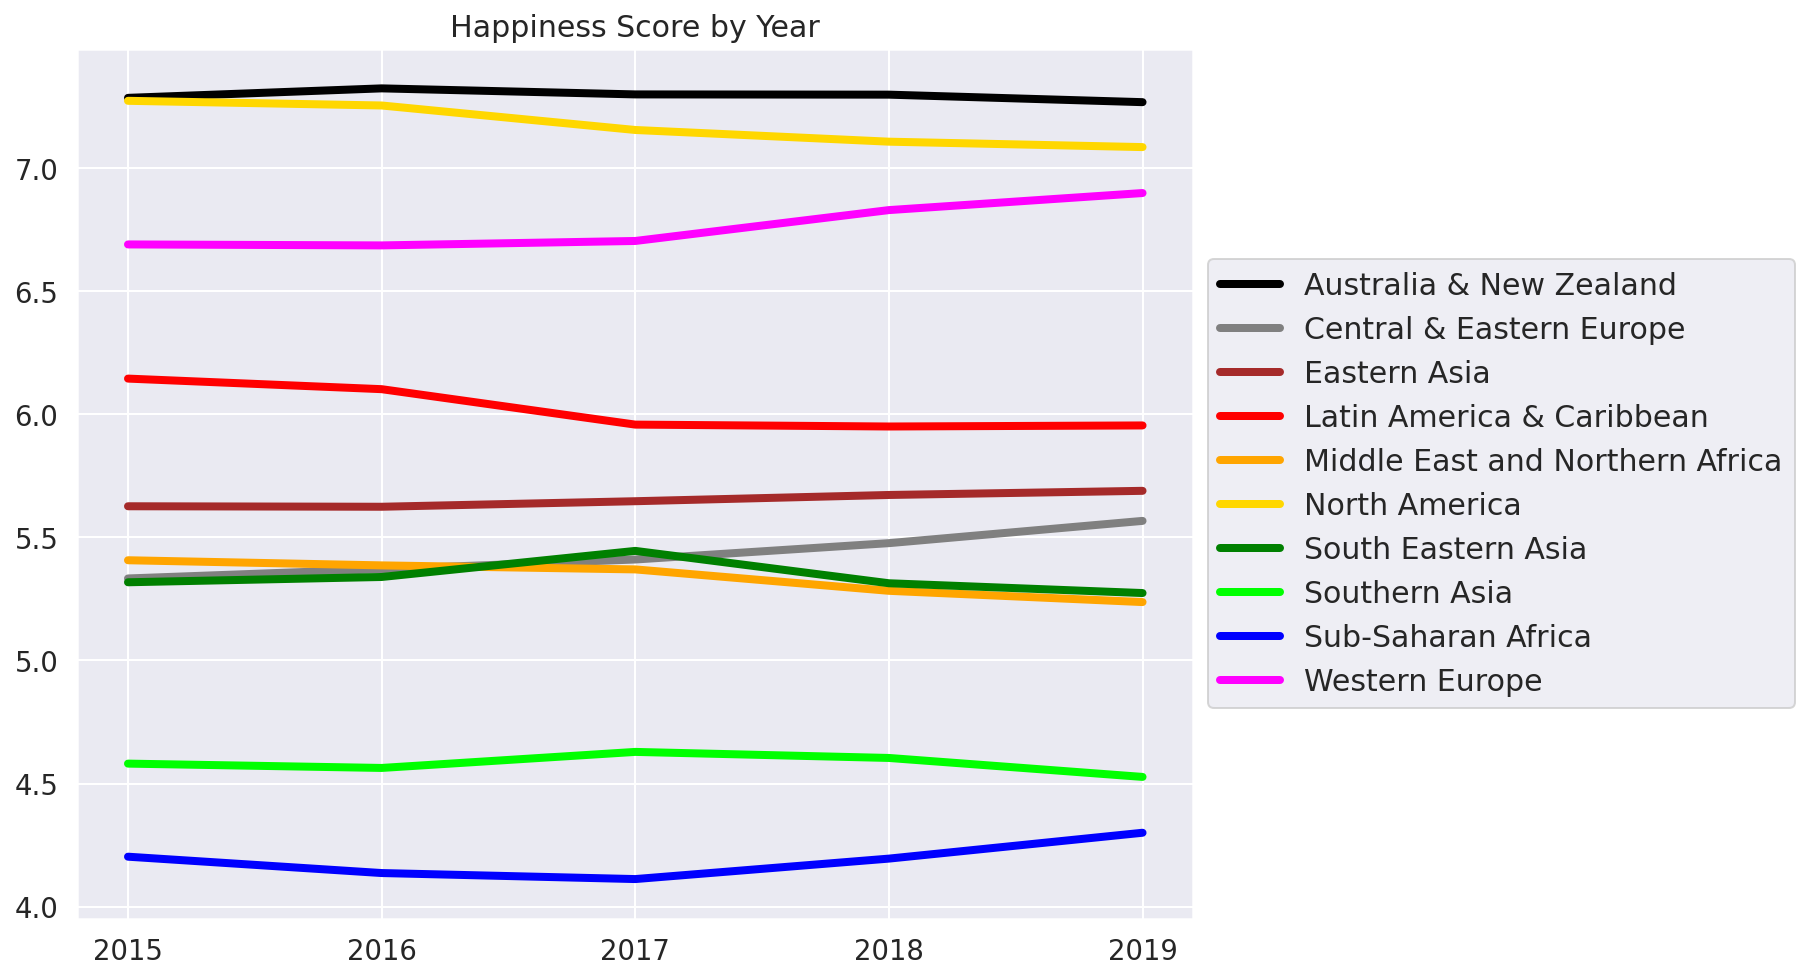

In [40]:
# 각 대륙의 연도별 행복지수 변화를 시각화

list_year = ['2015', '2016', '2017', '2018', '2019']
AusNZ = [df_Region2015['Score_Avg'][0], df_Region2016['Score_Avg'][0], df_Region2017['Score_Avg'][0],
         df_Region2018['Score_Avg'][0], df_Region2019['Score_Avg'][0]]
CEEu = [df_Region2015['Score_Avg'][1], df_Region2016['Score_Avg'][1], df_Region2017['Score_Avg'][1],
        df_Region2018['Score_Avg'][1], df_Region2019['Score_Avg'][1]]
EAsia = [df_Region2015['Score_Avg'][2], df_Region2016['Score_Avg'][2], df_Region2017['Score_Avg'][2],
        df_Region2018['Score_Avg'][2], df_Region2019['Score_Avg'][2]]
LACar = [df_Region2015['Score_Avg'][3], df_Region2016['Score_Avg'][3], df_Region2017['Score_Avg'][3],
        df_Region2018['Score_Avg'][3], df_Region2019['Score_Avg'][3]]
MENAf = [df_Region2015['Score_Avg'][4], df_Region2016['Score_Avg'][4], df_Region2017['Score_Avg'][4],
        df_Region2018['Score_Avg'][4], df_Region2019['Score_Avg'][4]]
NAmr = [df_Region2015['Score_Avg'][5], df_Region2016['Score_Avg'][5], df_Region2017['Score_Avg'][5],
        df_Region2018['Score_Avg'][5], df_Region2019['Score_Avg'][5]]
SEAsia = [df_Region2015['Score_Avg'][6], df_Region2016['Score_Avg'][6], df_Region2017['Score_Avg'][6],
        df_Region2018['Score_Avg'][6], df_Region2019['Score_Avg'][6]]
SAsia = [df_Region2015['Score_Avg'][7], df_Region2016['Score_Avg'][7], df_Region2017['Score_Avg'][7],
        df_Region2018['Score_Avg'][7], df_Region2019['Score_Avg'][7]]
SSAf = [df_Region2015['Score_Avg'][8], df_Region2016['Score_Avg'][8], df_Region2017['Score_Avg'][8],
        df_Region2018['Score_Avg'][8], df_Region2019['Score_Avg'][8]]
WEu = [df_Region2015['Score_Avg'][9], df_Region2016['Score_Avg'][9], df_Region2017['Score_Avg'][9],
        df_Region2018['Score_Avg'][9], df_Region2019['Score_Avg'][9]]

plt.figure(figsize=(10,8))
plt.plot(list_year, AusNZ, color='black', linewidth=4, label='Australia & New Zealand')
plt.plot(list_year, CEEu, color='gray', linewidth=4, label='Central & Eastern Europe')
plt.plot(list_year, EAsia, color='brown', linewidth=4, label='Eastern Asia')
plt.plot(list_year, LACar, color='red', linewidth=4, label='Latin America & Caribbean')
plt.plot(list_year, MENAf, color='orange', linewidth=4, label='Middle East and Northern Africa')
plt.plot(list_year, NAmr, color='gold', linewidth=4, label='North America')
plt.plot(list_year, SEAsia, color='green', linewidth=4, label='South Eastern Asia')
plt.plot(list_year, SAsia, color='lime', linewidth=4, label='Southern Asia')
plt.plot(list_year, SSAf, color='blue', linewidth=4, label='Sub-Saharan Africa')
plt.plot(list_year, WEu, color='magenta', linewidth=4, label='Western Europe')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=15)
plt.title('Happiness Score by Year', fontsize=15)
plt.show()

#한국 데이터 확인

In [41]:
#dataframe 출력 시, 데이터 많을 때 '...'으로 생략하지 않고 전체 다 보여줌
pd.set_option('display.max_columns', None)

2015-2019년 중 한국 데이터 통합

In [42]:
korea = happiness2015.loc[happiness2015.Country == 'South Korea']
for i in happiness[1:]:
    korea = pd.concat([korea, i.loc[i.Country == 'South Korea']], axis=0)

korea = korea[['Rank', 'Score', 'GDP', 'Social Support', 'Healthy Life Expectancy', 'Freedom', 'Corruption', 'Generosity', 'Dystopia Residual']]

korea['Year'] = np.linspace(2015, 2019, 5, dtype=int)
korea = korea.set_index('Year')
display(korea)

,Rank,Score,GDP,Social Support,Healthy Life Expectancy,Freedom,Corruption,Generosity,Dystopia Residual
Year,,,,,,,,,
2015,47,5.984,1.244610,0.957740,0.965380,0.332080,0.078570,0.185570,2.219780
2016,57,5.835,1.359480,0.721940,0.886450,0.251680,0.077160,0.188240,2.350150
2017,55,5.838,1.401678,1.128274,0.900214,0.257922,0.063283,0.206674,1.880378
2018,57,5.875,1.266000,1.204000,0.955000,0.244000,0.051000,0.175000,NaN
2019,54,5.895,1.301000,1.219000,1.036000,0.159000,0.056000,0.175000,NaN


한국의 피처별 그래프 작성

In [43]:
korea = korea.reset_index()

In [44]:
korea['sum'] = korea[['GDP', 'Social Support', 'Healthy Life Expectancy', 'Freedom', 'Corruption', 'Generosity', 'Dystopia Residual']].sum(axis=1).round(3)
display(korea)

,Year,Rank,Score,GDP,Social Support,Healthy Life Expectancy,Freedom,Corruption,Generosity,Dystopia Residual,sum
0,2015,47,5.984,1.244610,0.957740,0.965380,0.332080,0.078570,0.185570,2.219780,5.984
1,2016,57,5.835,1.359480,0.721940,0.886450,0.251680,0.077160,0.188240,2.350150,5.835
2,2017,55,5.838,1.401678,1.128274,0.900214,0.257922,0.063283,0.206674,1.880378,5.838
3,2018,57,5.875,1.266000,1.204000,0.955000,0.244000,0.051000,0.175000,NaN,3.895
4,2019,54,5.895,1.301000,1.219000,1.036000,0.159000,0.056000,0.175000,NaN,3.946


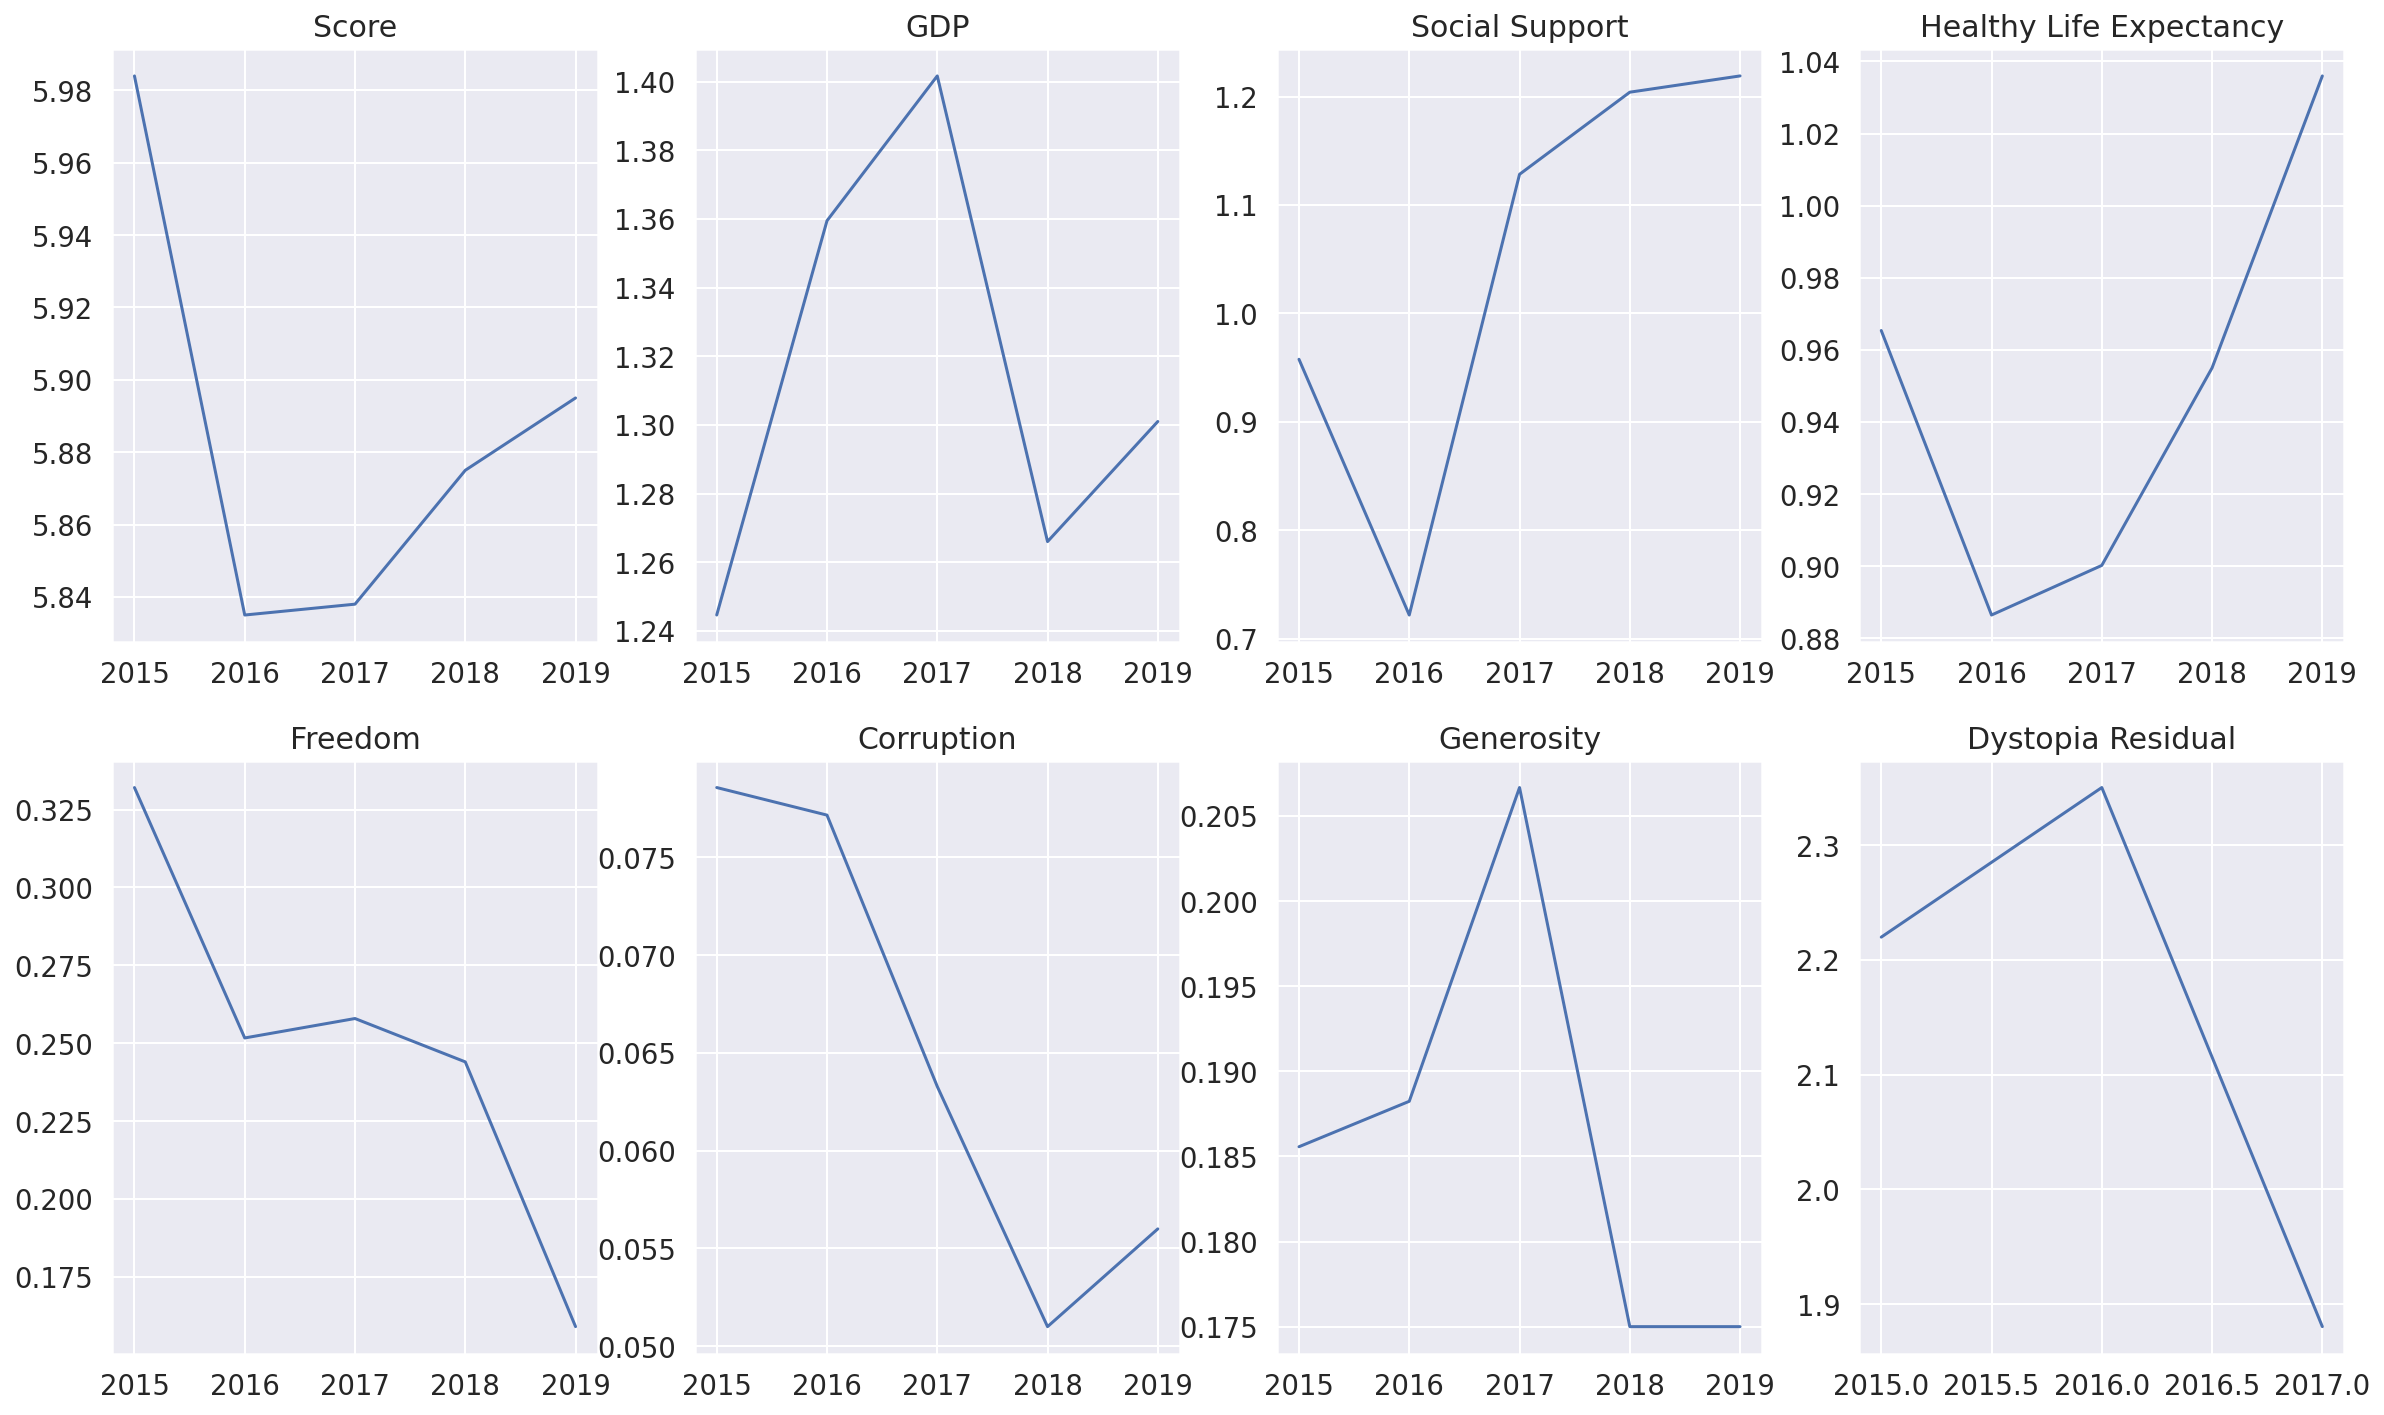

In [45]:
plt.figure(figsize=(20,12))
for iter, feature in enumerate(features_tmp):
    plt.subplot(2,4,iter+1)
    plt.plot(korea.Year, korea[feature])
    plt.title(feature)
    ymin = statistics[feature]['min']
    ymax = statistics[feature]['max']
    plt.ylim(ymin, ymax)
plt.show()

# 세계행복보고서  
세계행복보고서는 유엔 산하 자문기구인 지속가능발전해법네트워크가 매년 발표하는 보고서로, 세계 각 나라 거주민들의 행복을 정량화하여 행복지수로 표현하고, 이를 통해 정부, 기업 및 시민 사회가 행복에 관한 복지를 평가 및 피드백 할 수 있도록 한다.  
각 나라별 1000명의 사람들에게 자신의 삶의 만족도를 조사한 갤럽의 월드 폴(World Poll)을 바탕으로 구매력 기준 GDP, 기대수명, 사회적 지지, 선택의 자유, 아량, 부정부패 등 6가지 변수를 고려하여 평가한다.  
2018년 보고서부터는 이민자들의 행복지수 순위를 별도로 산출하였다. (Wikipedia, 2022.09.26.)


# 데이터 분석에 대한 방향  
데이터의 feature들이 어떤 기준으로 산출되는지 알 수 없었고, 결과값이라 할 수 있는 점수도 feature들의 값들을 단순히 더한 것이었기에 지금껏 노드를 진행하며 배웠던 모델을 통한 예측이 의미가 없다고 판단되어 우리 세계정복 조는 데이터 자체에 좀 더 집중하기로 했다.


# 엿보기  
데이터는 5개로 2015년부터 2019년까지의 연도별 보고서들이다.  
각 연도마다 대상 국가들이 조금씩 상이하며 2016년까지 2개 보고서에는 각 국가들이 속한 대륙이 어디인지 표기되어있지만 2017년부터는 대륙에 대한 정보가 없고, 일부 보고서만이 표준 오차나 신뢰구간 등의 통계적 자료를 함께 제공하고 있으며, 2017년 보고서까지는 Dystopia Residual이라는 feature가 존재하지만 2018년 보고서부터는 해당 feature가 빠져있는 등, 같은 기관에서 발행한 보고서이지만 연도별로 형태가 조금씩 상이한 모습을 보여준다.  
때문에 컴퓨터에 자료를 집어넣기 위함이 아닌, 자료를 좀 더 일관성 있게 보기 위한 전처리가 필요했다.


# 데이터 분석  
각 보고서들은 GDP, 건강수명, 사회적 지지, 선택의 자유, 아량, 부정부패 등의 항목들에 국가별로 점수를 매겨 순서대로 나열한 데이터들이다.  
각 항목의 점수들의 최대값과 최소값이 모두 상이한 것으로 보아, GDP, 건강수명, 사회적 지지 항목들에는 어느 정도 높은 가중치가 적용된 것으로 보여지며, 선택의 자유, 아량, 부정부패 등의 항목들은 순위를 산정함에 있어 다소 낮은 영향을 미치는 것으로 보인다.  
위의 이유때문에 선택의 자유, 아량, 부정부패 등의 항목들에서 다소 높은 점수를 기록한 국가여도 GDP나 건강수명 면에서 다른 국가들에 비해 현저히 낮은 점수를 기록하여 하위권에 랭크된 르완다와 같은 국가가 있다.  
2017년 데이터들부터는 대륙에 대한 정보는 표기되어있지 않지만, 대체적으로 서유럽에 속한 국가들이 높은 순위를 점하고 사하라 이남 아프리카 지역의 국가들이 낮은 순위를 기록하고있다.


# 데이터에 대한 의견  
데이터의 이름이 세계행복보고서이기는 하지만, 행복이라는 가치는 지극히 주관적일 뿐만 아니라 한 명 한 명의 개인에게 모두 현재 행복한지를 물은 것이 아니므로 문자 그대로의 행복보고서라는 이름이 적절한지 의문이 들었다.  
재력이 삶의 질에 크게 영향을 미치지 않는다고 볼 수는 없지만 부와 행복이 정비례하지 않는다는 것을 생각해보면, 오히려 선진국들의 입맛에 맞춘 기준에 따라 부조리하게 만들어진 보고서라는 생각까지 들 정도였다.  
행복이라는 가치에 대해서 다시 한 번 생각해보는 계기가 되었다.